In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pathlib
%matplotlib inline

import datetime as dt
from datetime import datetime

from sklearn.feature_selection import VarianceThreshold

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_percentage_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from dateutil.relativedelta import relativedelta as rd
from pmdarima.arima import auto_arima

import warnings
warnings.filterwarnings('ignore')


In [2]:
market_cap=pd.read_excel(r'C:\Users\KIRAN JEEVA\Desktop\data science assesments\Simplilearn\Datasets (5)\Share Market Analysis Dataset\Nasdaq 100 Market cap.xlsx')
metrics_ratio=pd.read_excel(r'C:\Users\KIRAN JEEVA\Desktop\data science assesments\Simplilearn\Datasets (5)\Share Market Analysis Dataset\nasdaq100_metrics_ratios.xlsx')

In [3]:
market_cap['Symbol'].unique()

array(['AAPL', 'ABNB', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AEP', 'ALGN',
       'AMAT', 'AMD', 'AMGN', 'AMZN', 'ANSS', 'ASML', 'ATVI', 'AVGO',
       'AZN', 'BIDU', 'BIIB', 'BKNG', 'CDNS', 'CEG', 'CHTR', 'CMCSA',
       'COST', 'CPRT', 'CRWD', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'DDOG',
       'DLTR', 'DOCU', 'DXCM', 'EA', 'EBAY', 'EXC', 'FAST', 'FISV',
       'FTNT', 'GILD', 'GOOG', 'GOOGL', 'HON', 'IDXX', 'ILMN', 'INTC',
       'INTU', 'ISRG', 'JD', 'KDP', 'KHC', 'KLAC', 'LCID', 'LRCX', 'LULU',
       'MAR', 'MCHP', 'MDLZ', 'MELI', 'META', 'MNST', 'MRNA', 'MRVL',
       'MSFT', 'MTCH', 'MU', 'NFLX', 'NTES', 'NVDA', 'NXPI', 'ODFL',
       'OKTA', 'ORLY', 'PANW', 'PAYX', 'PCAR', 'PDD', 'PEP', 'PYPL',
       'QCOM', 'REGN', 'ROST', 'SBUX', 'SGEN', 'SIRI', 'SNPS', 'SPLK',
       'SWKS', 'TEAM', 'TMUS', 'TSLA', 'TXN', 'VRSK', 'VRSN', 'VRTX',
       'WBA', 'WDAY', 'XEL', 'ZM', 'ZS'], dtype=object)

In [4]:
data=[]
abs_files=[]
for file_name in market_cap.Symbol.unique():
    try:
        file_path='C:/Users/KIRAN JEEVA/Desktop/data science assesments/Simplilearn/Datasets (5)/Share Market Analysis Dataset/NASDAQ_DATA/' + file_name + '.csv'
        temp_file=pd.read_csv(file_path,parse_dates=['Date'],infer_datetime_format=True)
        temp_file.insert(loc=0,column='Symbol',value=file_name)
        data.append(temp_file)
    
    except:
        abs_files.append(file_name)
        continue

In [5]:
df=pd.concat(data)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 474247 entries, 0 to 1164
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Symbol     474247 non-null  object        
 1   Date       474247 non-null  datetime64[ns]
 2   High       474247 non-null  float64       
 3   Low        474247 non-null  float64       
 4   Open       474247 non-null  float64       
 5   Close      474247 non-null  float64       
 6   Volume     474247 non-null  float64       
 7   Adj Close  474247 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(1)
memory usage: 32.6+ MB


In [7]:
df.isnull().sum()

Symbol       0
Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [8]:
df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
0,AAPL,1999-12-31,0.918527,0.888393,0.901228,0.917969,163811200.0,0.782493
1,AAPL,2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.851942
2,AAPL,2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.780115
3,AAPL,2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.791530
4,AAPL,2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.723033


In [9]:
ranges=df.groupby(['Symbol'])['Date'].agg(['max','min'])

In [10]:
ranges.head()

,max,min
Symbol,,
AAPL,2022-10-28,1999-12-31
ABNB,2022-10-28,2020-12-10
ADBE,2022-10-28,1999-12-31
ADI,2022-10-28,1999-12-31
ADP,2022-10-28,1999-12-31


In [11]:
start=dt.datetime(2012,10,28)
end=dt.datetime(2022,10,28)

In [12]:
start

datetime.datetime(2012, 10, 28, 0, 0)

In [13]:
df[(df['Date']>=start) & (df['Date']<=end)].groupby('Symbol').size().sort_values()

Symbol
CEG      197
ABNB     475
LCID     533
DDOG     785
CRWD     854
        ... 
FTNT    2517
FISV    2517
FAST    2517
ILMN    2517
AAPL    2517
Length: 102, dtype: int64

In [14]:
df=df[(df['Date']>=start) & (df['Date']<=end)]

In [15]:
df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
3228,AAPL,2012-10-31,21.498571,20.989286,21.245714,21.261429,510003200.0,18.201437
3229,AAPL,2012-11-01,21.535713,21.220358,21.365000,21.305000,361298000.0,18.238741
3230,AAPL,2012-11-02,21.319643,20.526787,21.281786,20.600000,599373600.0,17.635199
3231,AAPL,2012-11-05,20.991785,20.628571,20.840000,20.879286,529135600.0,17.874296
3232,AAPL,2012-11-06,21.097857,20.717501,21.079643,20.816071,374917200.0,17.820169


In [16]:
df.reset_index(drop=True,inplace=True)

In [17]:
df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
0,AAPL,2012-10-31,21.498571,20.989286,21.245714,21.261429,510003200.0,18.201437
1,AAPL,2012-11-01,21.535713,21.220358,21.365000,21.305000,361298000.0,18.238741
2,AAPL,2012-11-02,21.319643,20.526787,21.281786,20.600000,599373600.0,17.635199
3,AAPL,2012-11-05,20.991785,20.628571,20.840000,20.879286,529135600.0,17.874296
4,AAPL,2012-11-06,21.097857,20.717501,21.079643,20.816071,374917200.0,17.820169


In [18]:
market_cap.head()

,Symbol,Name,Market Cap,Last Sale,Net Change,Percentage Change
0,AAPL,Apple Inc.,2625740143000,$151.45,$2.00,0.0134
1,ABNB,"Airbnb, Inc.",69569944167,$116.65,$0.26,0.0022
2,ADBE,Adobe Inc.,149144569000,$320.81,$4.59,0.0145
3,ADI,"Analog Devices, Inc.",75484763090,$146.76,$2.23,0.0154
4,ADP,"Automatic Data Processing, Inc.",98332762096,$236.78,$0.13,-0.0005


In [19]:
metrics_ratio.symbol.unique().size

102

In [20]:
df_merge=pd.merge(market_cap[['Symbol','Market Cap','Last Sale']],metrics_ratio,left_on='Symbol',right_on='symbol').drop('symbol',axis=1)

In [21]:
df_merge.head()

,Symbol,Market Cap,Last Sale,company,sector,subsector,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,AAPL,2625740143000,$151.45,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",0.66,0.72,0.74,0.83,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,ABNB,69569944167,$116.65,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,NaN,0.55,0.64,0.36,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,ADBE,149144569000,$320.81,Adobe Inc.,Information Technology,Application Software,0.54,0.54,0.57,0.57,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,ADI,75484763090,$146.76,Analog Devices,Information Technology,Semiconductors,0.36,0.30,0.29,0.26,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,ADP,98332762096,$236.78,ADP,Information Technology,Data Processing & Outsourced Services,NaN,0.34,0.34,0.35,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02


In [22]:
df_merge['Last Sale']=df_merge['Last Sale'].map(lambda x:x.strip('$').replace(',','')).astype(float)

In [23]:
num_cols=df_merge.columns[df_merge.dtypes.values!='object']
obj_cols=df_merge.columns[df_merge.dtypes.values=='object']
obj_cols

Index(['Symbol', 'company', 'sector', 'subsector'], dtype='object')

In [24]:
selector=VarianceThreshold(threshold=0.005)
selector.fit(df_merge[num_cols])
abv_thres=selector.get_support()
selected_cols=num_cols[abv_thres]

In [25]:
df2=pd.concat([df_merge[obj_cols],df_merge[selected_cols]],axis=1)

In [26]:
df2.columns=df2.columns.map(lambda x: x.lower().strip().replace(' ','_'))

In [27]:
df2.head()

,symbol,company,sector,subsector,market_cap,last_sale,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,...,yoy_eps_growth_2021,yoy_eps_growth_2022,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_2022,yoy_revenue_growth_latest
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",2625740143000,151.45,0.66,0.72,0.74,0.83,...,71.04,NaN,-7.69,11.34,21.69,5.36,11.94,38.50,NaN,5.11
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,69569944167,116.65,NaN,0.55,0.64,0.36,...,96.46,NaN,609.09,NaN,40.08,31.58,31.27,-18.11,NaN,41.00
2,ADBE,Adobe Inc.,Information Technology,Application Software,149144569000,320.81,0.54,0.54,0.57,0.57,...,-7.48,NaN,-3.97,25.51,24.45,25.21,16.86,23.69,NaN,15.54
3,ADI,Analog Devices,Information Technology,Semiconductors,75484763090,146.76,0.36,0.30,0.29,0.26,...,5.49,NaN,6.67,36.64,10.91,-3.22,-6.25,21.07,NaN,26.30
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,98332762096,236.78,NaN,0.34,0.34,0.35,...,6.49,15.32,19.05,NaN,8.65,7.16,4.84,4.95,11.87,12.02


In [28]:
df2.drop(df2.columns[(df2.isnull().sum()/df2.shape[0]>=0.3).values],axis=1,inplace=True)

In [29]:
df2.head()

,symbol,company,sector,subsector,market_cap,last_sale,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,asset_turnover_2020,...,yoy_eps_growth_2019,yoy_eps_growth_2020,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest
0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",2625740143000,151.45,0.66,0.72,0.74,0.83,...,-0.34,10.44,71.04,-7.69,11.34,21.69,5.36,11.94,38.50,5.11
1,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,69569944167,116.65,NaN,0.55,0.64,0.36,...,NaN,NaN,96.46,609.09,NaN,40.08,31.58,31.27,-18.11,41.00
2,ADBE,Adobe Inc.,Information Technology,Application Software,149144569000,320.81,0.54,0.54,0.57,0.57,...,15.38,80.50,-7.48,-3.97,25.51,24.45,25.21,16.86,23.69,15.54
3,ADI,Analog Devices,Information Technology,Semiconductors,75484763090,146.76,0.36,0.30,0.29,0.26,...,-8.75,-10.14,5.49,6.67,36.64,10.91,-3.22,-6.25,21.07,26.30
4,ADP,ADP,Information Technology,Data Processing & Outsourced Services,98332762096,236.78,NaN,0.34,0.34,0.35,...,23.29,8.78,6.49,19.05,NaN,8.65,7.16,4.84,4.95,12.02


In [30]:
missing_val_cols=df2.columns[(df2.isnull().sum()/df2.shape[0]>0)]

In [31]:
for cols in missing_val_cols:
    med=df2.groupby('sector')[cols].median()
    for sec in med.index:
        df2.loc[df2['sector']==sec,cols]=df2.loc[df2['sector']==sec,cols].fillna(value=med[sec])

In [32]:
df2.loc[(df2.isna().sum(axis=1)>0).values,(df2.isnull().sum()>0).values]

,mscore_2019,mscore_2020,mscore_2021,price_to_free_cashflow_2019,price_to_free_cashflow_2020,price_to_free_cashflow_2021,price_to_free_cashflow_latest
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
for i in df2.columns[(df2.isnull().sum()>0).values]:
    df2[i]=df2[i].fillna(df2[i].median())

In [34]:
df2.columns[df2.isnull().sum().values>0]

Index([], dtype='object')

In [35]:
df.head()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
0,AAPL,2012-10-31,21.498571,20.989286,21.245714,21.261429,510003200.0,18.201437
1,AAPL,2012-11-01,21.535713,21.220358,21.365000,21.305000,361298000.0,18.238741
2,AAPL,2012-11-02,21.319643,20.526787,21.281786,20.600000,599373600.0,17.635199
3,AAPL,2012-11-05,20.991785,20.628571,20.840000,20.879286,529135600.0,17.874296
4,AAPL,2012-11-06,21.097857,20.717501,21.079643,20.816071,374917200.0,17.820169


<AxesSubplot:xlabel='Date', ylabel='Adj Close'>

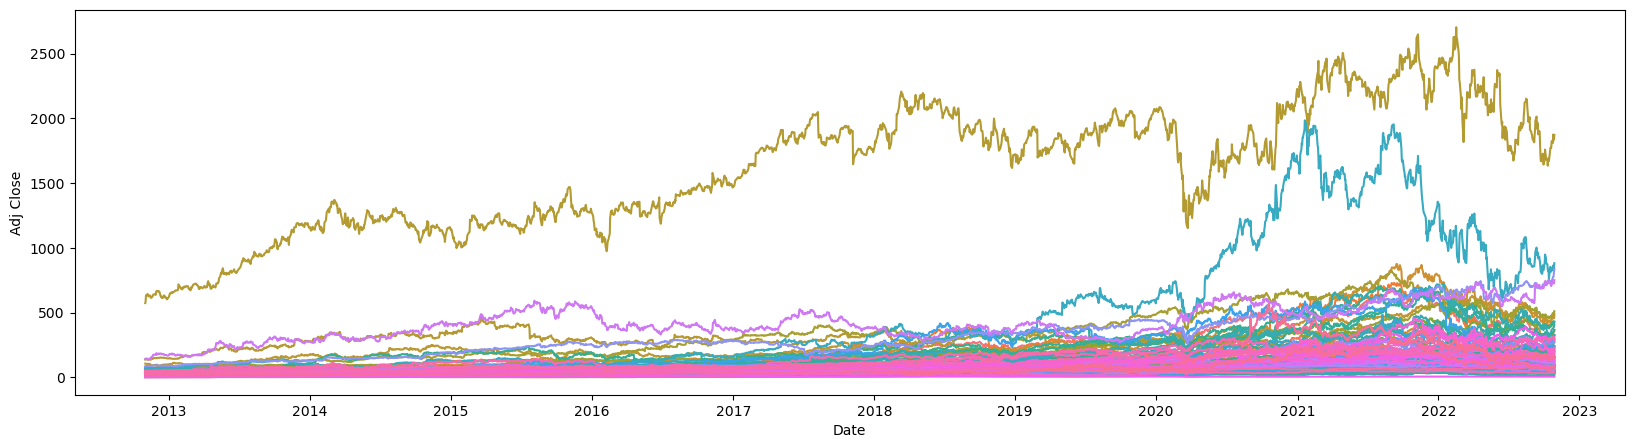

In [36]:
plt.figure(figsize=(20,5))
sns.lineplot(df['Date'],df['Adj Close'],hue=df['Symbol'],legend=False)

In [37]:
from pandas.tseries.offsets import YearBegin
from datetime import datetime,timedelta

In [38]:
end=dt.datetime(2020,1,1)
start=dt.datetime(2016,1,1)

In [39]:
end,start

(datetime.datetime(2020, 1, 1, 0, 0), datetime.datetime(2016, 1, 1, 0, 0))

In [40]:
aa=df.copy()
aa = aa[['Date', 'Symbol', 'Adj Close']]

In [41]:
aa['month']=aa.Date.dt.month
aa['year']=aa.Date.dt.year
aa['mon_yr']=aa['month'].astype(str)+'-'+aa['year'].astype(str)

In [42]:
aa.head()

,Date,Symbol,Adj Close,month,year,mon_yr
0,2012-10-31,AAPL,18.201437,10,2012,10-2012
1,2012-11-01,AAPL,18.238741,11,2012,11-2012
2,2012-11-02,AAPL,17.635199,11,2012,11-2012
3,2012-11-05,AAPL,17.874296,11,2012,11-2012
4,2012-11-06,AAPL,17.820169,11,2012,11-2012


In [43]:
mon_end = aa.groupby('mon_yr')['Date'].max()
mon_end[:5]

mon_yr
1-2013   2013-01-31
1-2014   2014-01-31
1-2015   2015-01-30
1-2016   2016-01-29
1-2017   2017-01-31
Name: Date, dtype: datetime64[ns]

In [44]:
month_end_Data = aa[aa.Date.isin(mon_end.values)]
month_end_Data.sort_values('Date' , inplace = True)

In [45]:
month_end_Data.head()

,Date,Symbol,Adj Close,month,year,mon_yr
0,2012-10-31,AAPL,18.201437,10,2012,10-2012
211313,2012-10-31,TMUS,16.918936,10,2012,10-2012
43264,2012-10-31,BIIB,138.210007,10,2012,10-2012
45781,2012-10-31,BKNG,573.770020,10,2012,10-2012
48298,2012-10-31,CDNS,12.650000,10,2012,10-2012


In [46]:
month_end_Data.sort_values(['Symbol', 'Date'], inplace = True)

In [47]:
month_end_Data['lag_series'] = month_end_Data['Adj Close'].shift(periods = 12)
month_end_Data['diff_series'] = month_end_Data['Adj Close'] - month_end_Data['lag_series']
month_end_Data['YOY'] = month_end_Data['diff_series'] /month_end_Data['lag_series']*100
month_end_Data.head()

,Date,Symbol,Adj Close,month,year,mon_yr,lag_series,diff_series,YOY
0,2012-10-31,AAPL,18.201437,10,2012,10-2012,NaN,NaN,NaN
21,2012-11-30,AAPL,17.976198,11,2012,11-2012,NaN,NaN,NaN
41,2012-12-31,AAPL,16.344994,12,2012,12-2012,NaN,NaN,NaN
62,2013-01-31,AAPL,13.989849,1,2013,1-2013,NaN,NaN,NaN
81,2013-02-28,AAPL,13.636104,2,2013,2-2013,NaN,NaN,NaN


In [48]:
month_end_Data = month_end_Data[['Date', 'Symbol','Adj Close', 'YOY']]
month_end_Data.head(20)

,Date,Symbol,Adj Close,YOY
0,2012-10-31,AAPL,18.201437,NaN
21,2012-11-30,AAPL,17.976198,NaN
41,2012-12-31,AAPL,16.344994,NaN
62,2013-01-31,AAPL,13.989849,NaN
81,2013-02-28,AAPL,13.636104,NaN
101,2013-03-28,AAPL,13.675032,NaN
123,2013-04-30,AAPL,13.678734,NaN
145,2013-05-31,AAPL,13.985406,NaN
165,2013-06-28,AAPL,12.331028,NaN
187,2013-07-31,AAPL,14.072475,NaN


In [49]:
start = dt.datetime(2018, 1, 1)
data_2018 = month_end_Data[month_end_Data.Date >= start]
data_2018

,Date,Symbol,Adj Close,YOY
1321,2018-01-31,AAPL,39.802277,40.191505
1340,2018-02-28,AAPL,42.516209,32.081005
1361,2018-03-29,AAPL,40.048103,18.637165
1382,2018-04-30,AAPL,39.446598,16.863434
1404,2018-05-31,AAPL,44.776775,24.230744
...,...,...,...,...
235937,2022-06-30,ZS,149.509995,-30.801631
235957,2022-07-29,ZS,155.059998,-34.271546
235980,2022-08-31,ZS,159.240005,-42.789392
236001,2022-09-30,ZS,164.369995,-37.315996


In [50]:
new = pd.merge(data_2018,metrics_ratio[['symbol', 'sector']], how = 'left', left_on = 'Symbol', right_on = 'symbol')
new.head()

,Date,Symbol,Adj Close,YOY,symbol,sector
0,2018-01-31,AAPL,39.802277,40.191505,AAPL,Information Technology
1,2018-02-28,AAPL,42.516209,32.081005,AAPL,Information Technology
2,2018-03-29,AAPL,40.048103,18.637165,AAPL,Information Technology
3,2018-04-30,AAPL,39.446598,16.863434,AAPL,Information Technology
4,2018-05-31,AAPL,44.776775,24.230744,AAPL,Information Technology


In [51]:
pivot_data = data_2018.pivot_table('YOY',index = 'Symbol', columns = 'Date')
pivot_data.head()

Date,2018-01-31,2018-02-28,2018-03-29,2018-04-30,2018-05-31,2018-06-29,2018-07-31,2018-08-31,2018-09-28,2018-10-31,...,2022-01-31,2022-02-28,2022-03-31,2022-04-29,2022-05-31,2022-06-30,2022-07-29,2022-08-31,2022-09-30,2022-10-28
Symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,40.191505,32.081005,18.637165,16.863434,24.230744,30.528747,29.932123,40.897422,48.684921,31.429967,...,33.265735,36.979553,43.796798,20.635162,20.127088,0.395092,12.051595,4.130274,-1.784878,4.547865
ABNB,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-16.152046,-26.585897,-8.609135,-11.290602,-13.910251,-41.831003,-22.935902,-27.014647,-37.383010,-32.491506
ADBE,76.186276,76.719631,66.049330,65.694629,75.722542,72.376975,67.028455,69.831144,80.955909,40.306000,...,16.463588,1.742550,-4.154659,-22.109215,-17.460061,-37.494026,-34.025064,-43.733615,-52.198981,-49.923120
ADI,25.309119,11.849000,13.625356,17.130737,15.785733,25.861343,24.218103,21.186925,9.464051,-6.463669,...,13.149705,4.645659,8.352702,2.537731,4.120226,-13.640312,4.530494,-5.306267,-15.279236,-14.962402
ADP,25.124723,14.860350,13.281944,15.504895,29.818434,33.738686,15.967532,40.800461,40.700627,26.523476,...,27.232511,19.712341,23.005053,18.878680,15.876408,7.746127,17.193209,19.127568,15.249484,10.099970


In [52]:
pivot_data_sect = pd.concat([pivot_data,metrics_ratio.set_index('symbol') [['sector']]], axis = 1)

In [53]:
dd = pivot_data_sect.loc[:,(pivot_data_sect.columns == dt.datetime(2020,3, 31)) | (pivot_data_sect.columns =='sector')]
dd.columns = ['march_end', 'sector']
dd.sort_values('march_end', ascending= True, inplace = True)
dd.sector.unique()

array(['Information Technology', 'Consumer Discretionary',
       'Communication Services', 'Health Care', 'Consumer Staples',
       'Utilities', 'Industrials'], dtype=object)

In [54]:
(dd[dd.march_end <0].sector.value_counts() / dd.sector.value_counts() * 100).sort_values()

Health Care               23.076923
Information Technology    40.476190
Consumer Staples          42.857143
Communication Services    46.153846
Utilities                 50.000000
Consumer Discretionary    53.333333
Industrials               62.500000
Name: sector, dtype: float64

In [55]:
dd = pivot_data_sect.loc[:,(pivot_data_sect.columns.isin([dt.datetime(2020,3, 31),
dt.datetime(2020,6, 30),
dt.datetime(2020,10, 30)])) | (pivot_data_sect.columns =='sector')]
dd.columns = ['march_end', 'june_end', 'oct_end','sector']

In [56]:
month_end_Data['lag'] = month_end_Data['Adj Close'].shift(periods=1)
month_end_Data['diff'] = month_end_Data['Adj Close'] - month_end_Data['lag']
month_end_Data['MOM'] = month_end_Data['diff']/month_end_Data['lag'] * 100
month_end_Data = month_end_Data[['Date', 'Symbol', 'Adj Close', 'YOY','MOM']]
xx = month_end_Data[month_end_Data.Date >= dt.datetime(2020, 3,31)].sort_values(['Symbol', 'Date'])

In [57]:
mod_data = df2.set_index('symbol').select_dtypes(exclude = 'object')
mod_data.shape

(102, 197)

In [58]:
sc=StandardScaler()
std_data=sc.fit_transform(mod_data)

In [59]:
pca=PCA()
pca.fit(std_data)
evr=np.cumsum(pca.explained_variance_ratio_)

In [60]:
n_comp=np.argmax(evr[evr<=0.95])+1

In [61]:
pca=PCA(n_components=n_comp)
data_pca=pca.fit_transform(std_data)

In [62]:
data_clus = pd.DataFrame(data_pca,columns = ['PC{}'.format(i+1) for i in range(49)])
data_clus.index = mod_data.index
data_clus.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49
symbol,,,,,,,,,,,,,,,,,,,,,
AAPL,2.508337,-2.054745,-1.612520,-1.999401,-0.366435,2.527236,0.436510,-0.797222,-1.254210,0.098371,...,-0.891626,0.496830,-1.541910,-1.019705,0.691069,1.611361,0.696945,-1.946363,-0.171967,0.075922
ABNB,1.051308,4.439363,0.273451,-0.165208,-1.828993,0.166281,1.146385,0.326789,2.743220,6.492364,...,-1.059672,0.136698,1.149882,-1.032162,-0.984620,0.961613,-1.359269,-1.330369,-0.286712,-0.558021
ADBE,-3.215002,1.093957,-2.242072,-0.713706,0.825084,-1.693384,0.852325,0.246143,-1.455072,1.215148,...,0.059579,0.317512,-0.640634,0.576526,-0.517937,-0.041230,0.250944,0.344094,0.572155,0.766298
ADI,-0.125396,-3.621437,-0.125646,3.223749,-0.237552,-2.759650,1.632047,-0.019027,0.538515,-0.433238,...,-1.603624,1.476081,-0.113934,0.086877,0.515098,-0.228884,-0.125881,-1.624033,0.521971,0.852195
ADP,1.777466,-1.366396,-0.616202,0.447205,-2.460888,1.965836,1.919656,-0.239102,0.406457,1.868282,...,0.479908,-0.829610,-0.341742,-0.486488,0.057552,-0.250968,-0.697267,-0.159633,-0.947180,0.218121


In [63]:
data_clus1 = data_clus.merge(metrics_ratio,left_index=True, right_index=False, right_on='symbol')[['PC'+str(i) for i in range(1,39)]+['sector']]
data_clus12 = pd.get_dummies(data_clus1, columns = ['sector'],drop_first=True)
data_clus12 = pd.get_dummies(data_clus1, columns = ['sector'],drop_first=True)

In [64]:
clus_std = sc.fit_transform(data_clus12)

In [65]:
errors = {}
for i in range(1,100):
    kmm = KMeans(n_clusters=i, random_state = 12)
    kmm.fit(clus_std)
    errors.update({i :round(kmm.inertia_,2)})
err = pd.Series(errors)

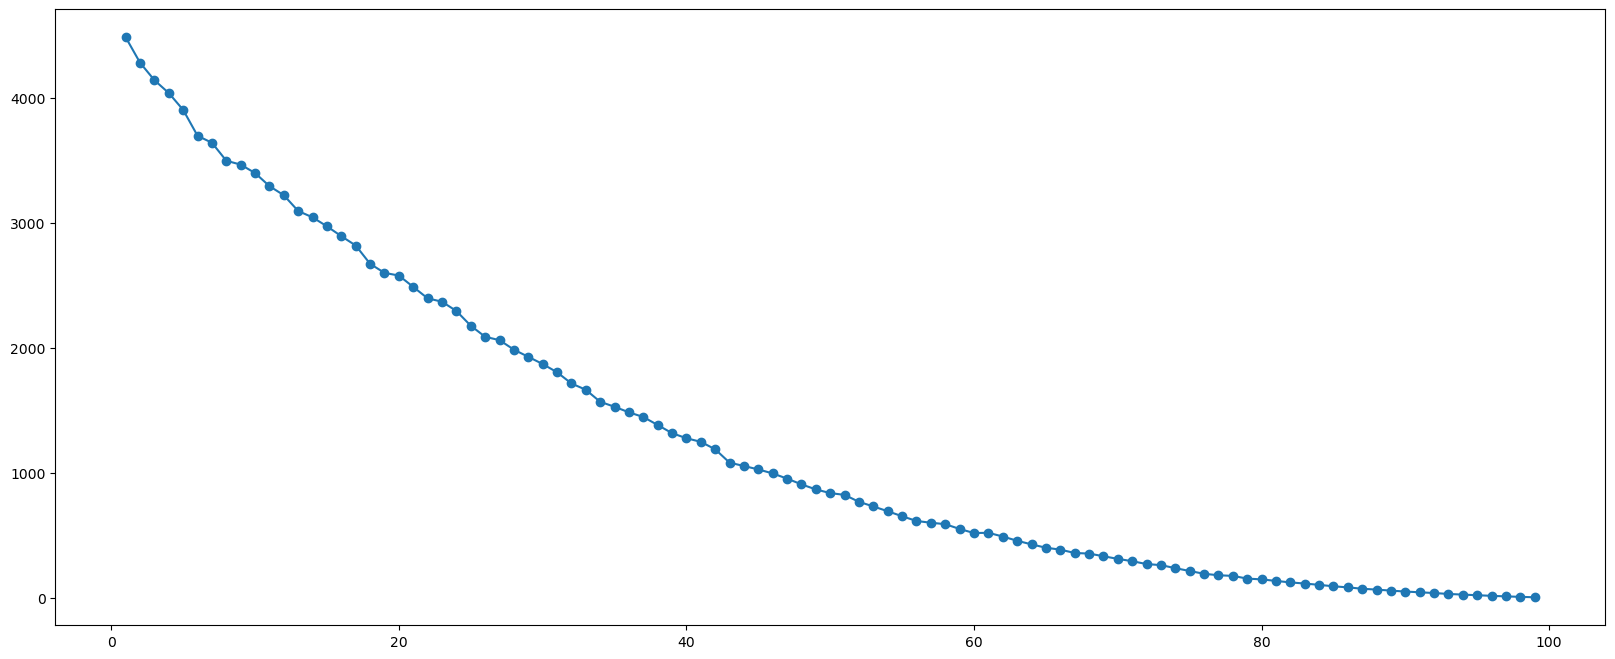

In [66]:
plt.figure(figsize = (20, 8))
plt.plot(err.index, err.values)
plt.scatter(err.index, err.values)
plt.show()

In [67]:
kmm = KMeans(n_clusters=7, random_state = 12)
kmm.fit(clus_std)
clus_labs = kmm.labels_

In [68]:
df2.insert(loc=0,column='cluster_labels',value=clus_labs)

In [69]:
df2.head()

,cluster_labels,symbol,company,sector,subsector,market_cap,last_sale,asset_turnover_2017,asset_turnover_2018,asset_turnover_2019,...,yoy_eps_growth_2019,yoy_eps_growth_2020,yoy_eps_growth_2021,yoy_eps_growth_latest,yoy_revenue_growth_2017,yoy_revenue_growth_2018,yoy_revenue_growth_2019,yoy_revenue_growth_2020,yoy_revenue_growth_2021,yoy_revenue_growth_latest
0,0,AAPL,Apple Inc.,Information Technology,"Technology Hardware, Storage & Peripherals",2625740143000,151.45,0.660,0.72,0.74,...,-0.340,10.440,71.04,-7.69,11.340,21.69,5.36,11.94,38.50,5.11
1,5,ABNB,Airbnb,Consumer Discretionary,Internet & Direct Marketing Retail,69569944167,116.65,0.825,0.55,0.64,...,12.505,34.085,96.46,609.09,23.355,40.08,31.58,31.27,-18.11,41.00
2,0,ADBE,Adobe Inc.,Information Technology,Application Software,149144569000,320.81,0.540,0.54,0.57,...,15.380,80.500,-7.48,-3.97,25.510,24.45,25.21,16.86,23.69,15.54
3,0,ADI,Analog Devices,Information Technology,Semiconductors,75484763090,146.76,0.360,0.30,0.29,...,-8.750,-10.140,5.49,6.67,36.640,10.91,-3.22,-6.25,21.07,26.30
4,0,ADP,ADP,Information Technology,Data Processing & Outsourced Services,98332762096,236.78,0.555,0.34,0.34,...,23.290,8.780,6.49,19.05,12.900,8.65,7.16,4.84,4.95,12.02


In [70]:
df2['cluster_labels'].value_counts()

0    40
3    32
5    14
2    10
1     4
4     1
6     1
Name: cluster_labels, dtype: int64

In [71]:
for i in range(7):
    print(df2[['symbol','cluster_labels','sector']].sort_values(by='cluster_labels')[df2.cluster_labels == i],'\n\n')

    symbol  cluster_labels                  sector
0     AAPL               0  Information Technology
39    FISV               0  Information Technology
40    FTNT               0  Information Technology
47    INTC               0  Information Technology
48    INTU               0  Information Technology
100     ZM               0  Information Technology
53    KLAC               0  Information Technology
55    LRCX               0  Information Technology
58    MCHP               0  Information Technology
64    MRVL               0  Information Technology
65    MSFT               0  Information Technology
67      MU               0  Information Technology
70    NVDA               0  Information Technology
71    NXPI               0  Information Technology
73    OKTA               0  Information Technology
75    PANW               0  Information Technology
76    PAYX               0  Information Technology
80    PYPL               0  Information Technology
81    QCOM               0  Inf

In [72]:
aapl_data=df[df.Symbol=='AAPL'][['Date','Adj Close']]

In [73]:
df.tail()

,Symbol,Date,High,Low,Open,Close,Volume,Adj Close
236017,ZS,2022-10-24,151.460007,144.300003,151.360001,148.669998,1375200.0,148.669998
236018,ZS,2022-10-25,157.580002,150.619995,150.619995,157.089996,1928300.0,157.089996
236019,ZS,2022-10-26,158.679001,149.210007,151.449997,151.029999,1865900.0,151.029999
236020,ZS,2022-10-27,156.904999,151.160004,153.289993,153.770004,1447800.0,153.770004
236021,ZS,2022-10-28,155.000000,148.279999,152.850006,153.960007,1230000.0,153.960007


In [74]:
aapl_data_2015 = aapl_data[aapl_data.Date>=datetime(2015,1,1)]

In [75]:
aapl_data_2015.set_index('Date',inplace=True)

In [76]:
aapl_data_2015.sort_index(inplace=True)

In [77]:
aapl_data_2015.index

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2022-10-17', '2022-10-18', '2022-10-19', '2022-10-20',
               '2022-10-21', '2022-10-24', '2022-10-25', '2022-10-26',
               '2022-10-27', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', length=1971, freq=None)

In [78]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [79]:
decomp=seasonal_decompose(aapl_data_2015,period=12)

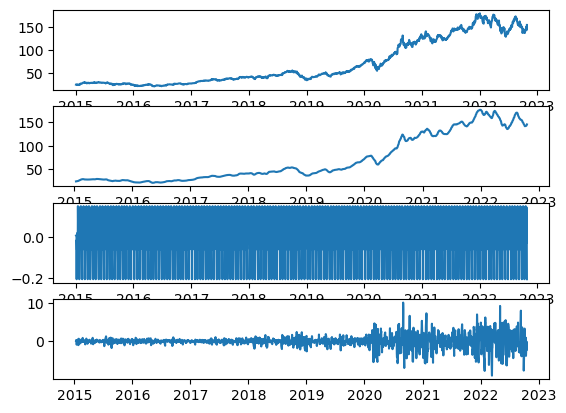

In [80]:
plt.subplot(4,1,1)
plt.plot(aapl_data_2015)
plt.subplot(4,1,2)
plt.plot(decomp.trend)
plt.subplot(4,1,3)
plt.plot(decomp.seasonal)
plt.subplot(4,1,4)
plt.plot(decomp.resid)

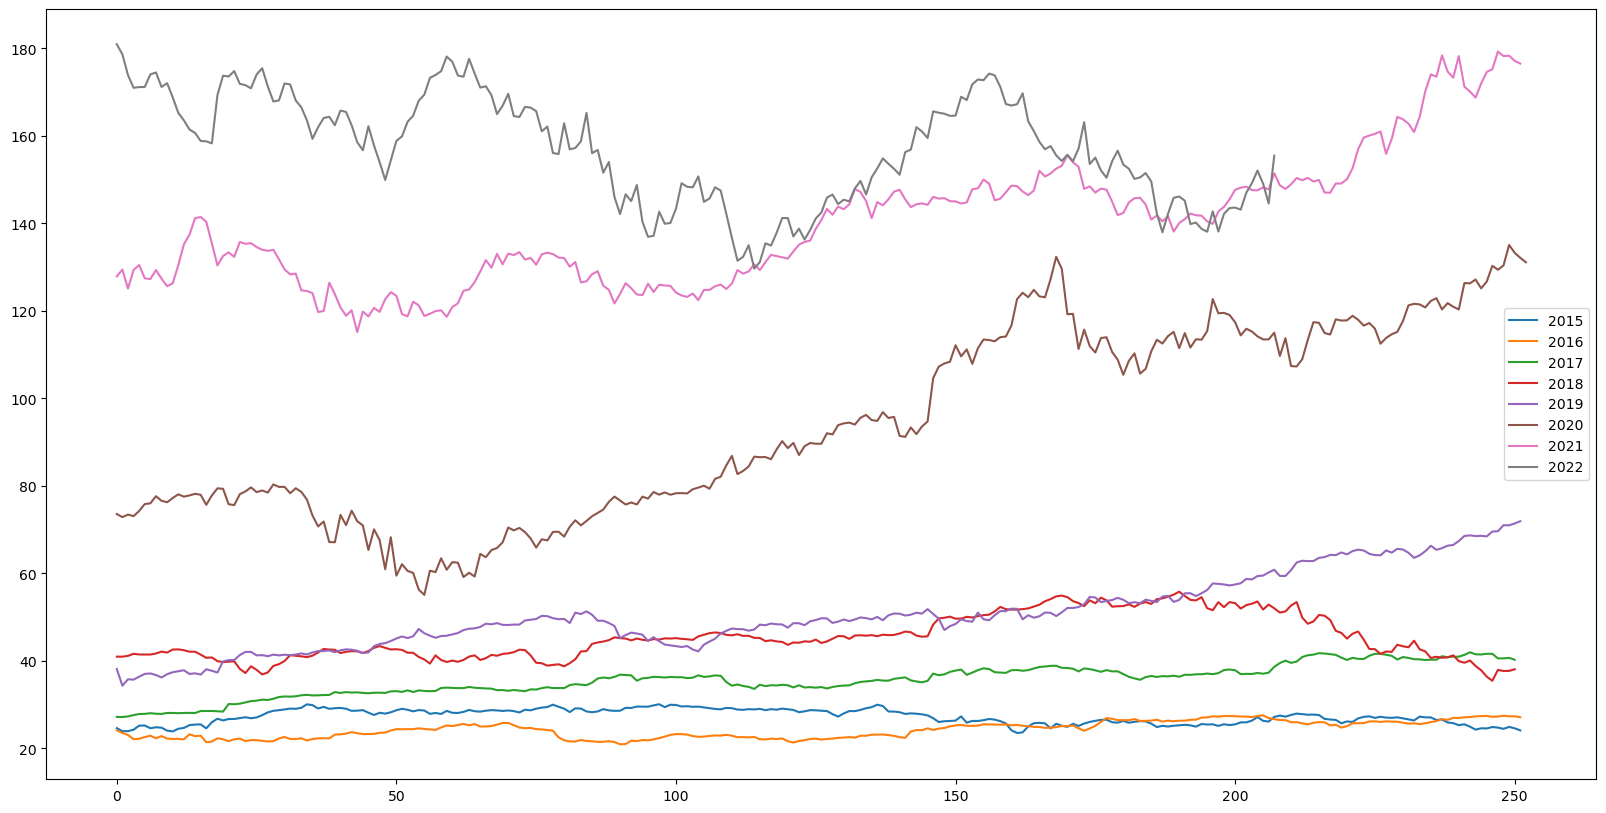

In [81]:
plt.figure(figsize=(20,10))
for i in (range(2015,2023)):
    x = list(aapl_data_2015.squeeze()[str(i)])
    plt.plot(x,label=i)
    plt.legend()
plt.show()

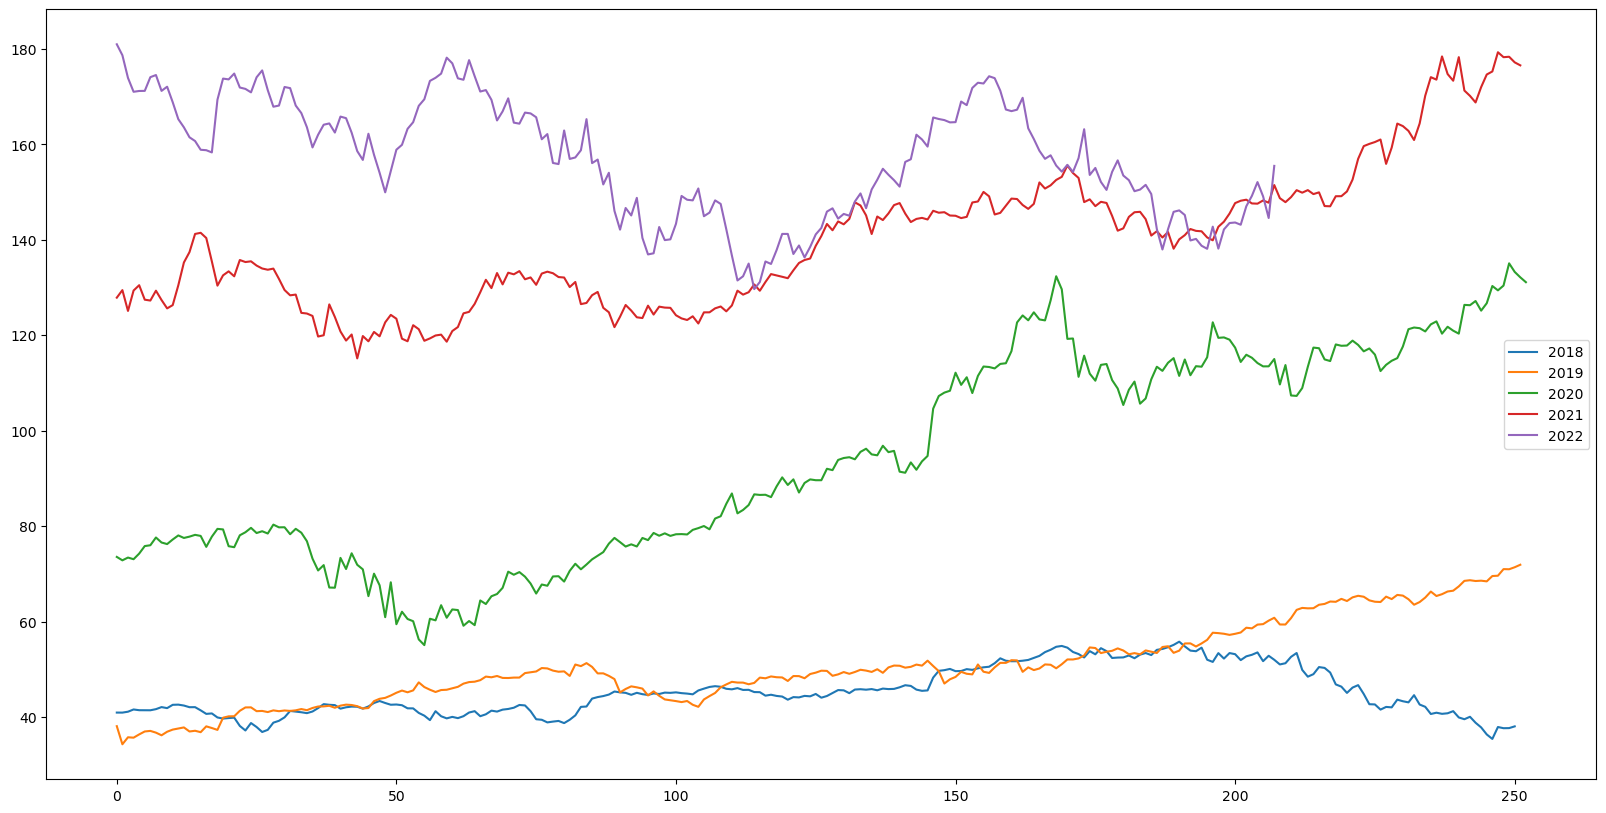

In [82]:
plt.figure(figsize=(20,10))
for i in (range(2018,2023)):
    x = list(aapl_data_2015.squeeze()[str(i)])
    plt.plot(x,label=i)
    plt.legend()
plt.show()

In [83]:
bb = aapl_data_2015.copy()

In [84]:
bb.reset_index(inplace=True)

In [85]:
bb['weekday'] = bb.Date.dt.weekday

In [86]:
week_end_data = bb[bb.weekday == 4]
week_end_data.tail(10)


,Date,Adj Close,weekday
1926,2022-08-26,163.349014,4
1931,2022-09-02,155.551956,4
1935,2022-09-09,157.109375,4
1940,2022-09-16,150.450424,4
1945,2022-09-23,150.180862,4
1950,2022-09-30,137.971115,4
1955,2022-10-07,139.857986,4
1960,2022-10-14,138.150833,4
1965,2022-10-21,147.026108,4
1970,2022-10-28,155.482086,4


In [87]:
week_end_data.drop(columns='weekday', inplace=True)
week_end_data.set_index('Date', inplace=True)
apple_weekend = week_end_data.squeeze()

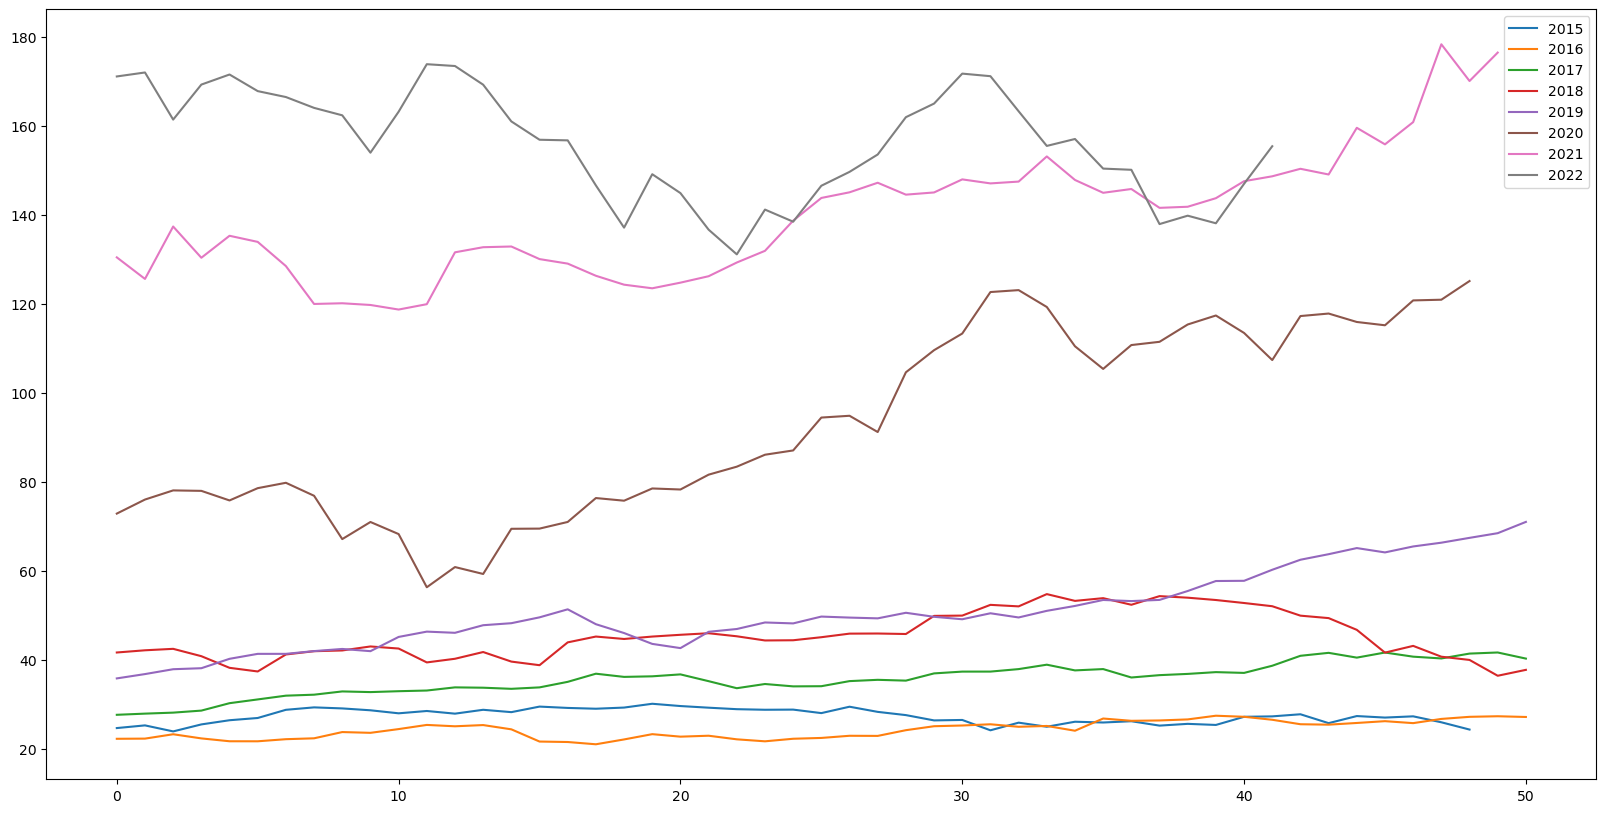

In [88]:
plt.figure(figsize=(20,10))
for i in (range(2015,2023)):
    x = list(apple_weekend[str(i)])
    plt.plot(x,label=i)
    plt.legend()
plt.show()

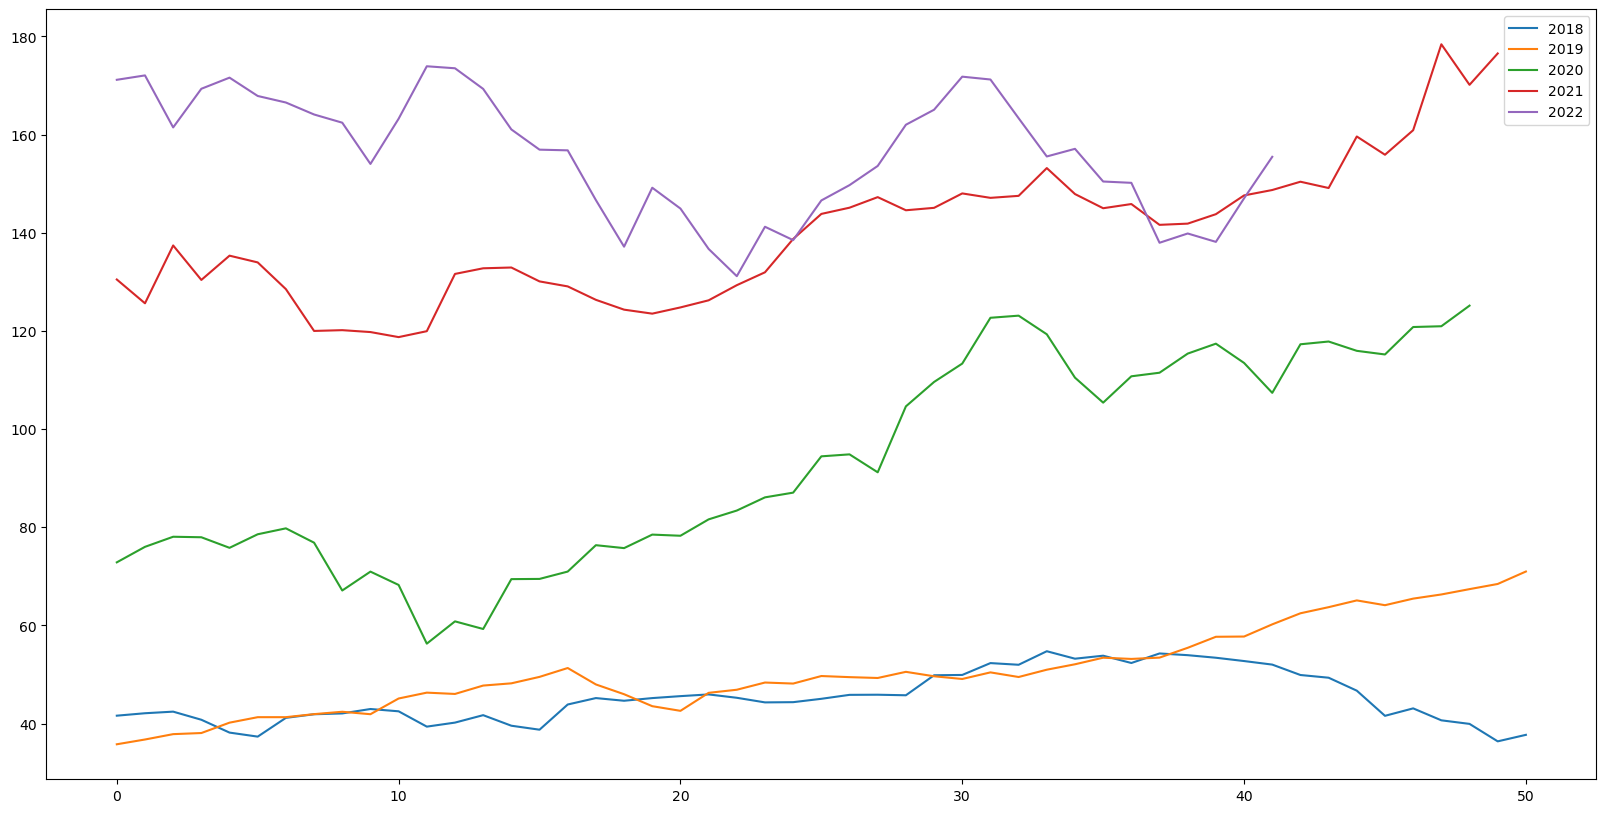

In [89]:
plt.figure(figsize=(20,10))
for i in (range(2018,2023)):
    x = list(apple_weekend[str(i)])
    plt.plot(x,label=i)
    plt.legend()
plt.show()

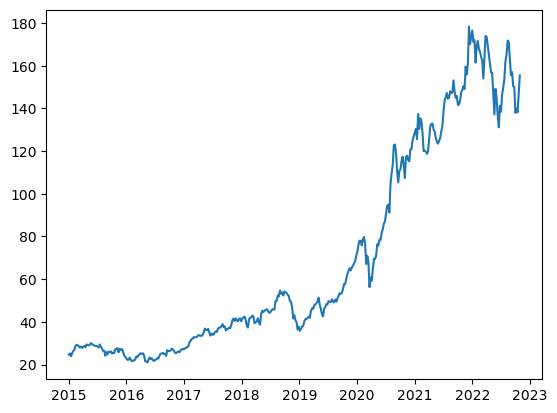

In [90]:
plt.plot(apple_weekend)
plt.show()

In [91]:
train = apple_weekend[:-12]
test = apple_weekend[-12:]

In [92]:
model=ExponentialSmoothing(train,trend='mul', seasonal='add', seasonal_periods=7).fit()

In [93]:
forecast = model.forecast(12)

In [94]:
forecast

382    165.234131
383    166.151917
384    167.618727
385    167.632960
386    168.329287
387    168.389567
388    169.247920
389    169.501673
390    170.429633
391    171.906641
392    171.931096
393    172.637670
dtype: float64

In [95]:
mean_absolute_percentage_error(test,forecast)

0.12171652847557468

In [96]:
model_final = ExponentialSmoothing(apple_weekend,trend='mul', seasonal='add', seasonal_periods=12).fit()
model_final.forecast(12)

394    155.728148
395    156.203800
396    155.825036
397    156.303448
398    157.466868
399    158.549246
400    158.607476
401    158.532466
402    158.422618
403    159.099456
404    160.377787
405    159.945005
dtype: float64

In [97]:
def test_stationarity(ts,title):
    
    plt.figure(figsize=(20,10))
    plt.plot(ts, label = 'Original')
    
    rol_mean=ts.rolling(12).mean()
    rol_std=ts.rolling(12).std()
    
    plt.plot(rol_mean, color = 'red', label = 'Rolling Mean')
    plt.plot(rol_std, color = 'black', label = 'Rolling STD')
    
    dftest = adfuller(ts)
    df = pd.Series(dftest[:4], index = ['Test Statistics', 'p-value', '# Lags Used', '# Obs used'])
    
    if (df['p-value'] >= 0.05):
        print('Time Series is Non-Stationary')
    else:
        print('Time Series is Stationary')
        
    for i in df.index:
        print('{}:{:.4f}'.format(i, df[i]))
        
    for i in dftest[4].keys():
        print('Critical {}:{:.4f}'.format(i, dftest[4][i]))
    
    plt.title(title)
    plt.legend(loc='best')
    plt.show()

In [98]:
apple_data = df[df.Symbol == 'AAPL'][['Date','Adj Close']]

In [99]:
cc = apple_data.copy()

In [100]:
cc['month'] = cc.Date.dt.month
cc['year'] = cc.Date.dt.year
cc['mon_yr'] = cc.month.astype(str) + '-' + cc.year.astype(str)

In [101]:
cc.head()

,Date,Adj Close,month,year,mon_yr
0,2012-10-31,18.201437,10,2012,10-2012
1,2012-11-01,18.238741,11,2012,11-2012
2,2012-11-02,17.635199,11,2012,11-2012
3,2012-11-05,17.874296,11,2012,11-2012
4,2012-11-06,17.820169,11,2012,11-2012


In [102]:
mon_end = cc.groupby('mon_yr').agg(max)['Date']
month_end_Data_apl = cc[cc.Date.isin(mon_end.values)]
month_end_Data_apl.sort_values('Date' , inplace = True)

In [103]:
apple_monthy2018 = month_end_Data_apl.loc[month_end_Data_apl.Date >= datetime(2018,1,1), ['Date', 'Adj Close']].set_index('Date').squeeze()
apple_monthy2018[:5]

Date
2018-01-31    39.802277
2018-02-28    42.516209
2018-03-29    40.048103
2018-04-30    39.446598
2018-05-31    44.776775
Name: Adj Close, dtype: float64

Time Series is Non-Stationary
Test Statistics:-0.5730
p-value:0.8770
# Lags Used:7.0000
# Obs used:50.0000
Critical 1%:-3.5685
Critical 5%:-2.9214
Critical 10%:-2.5987


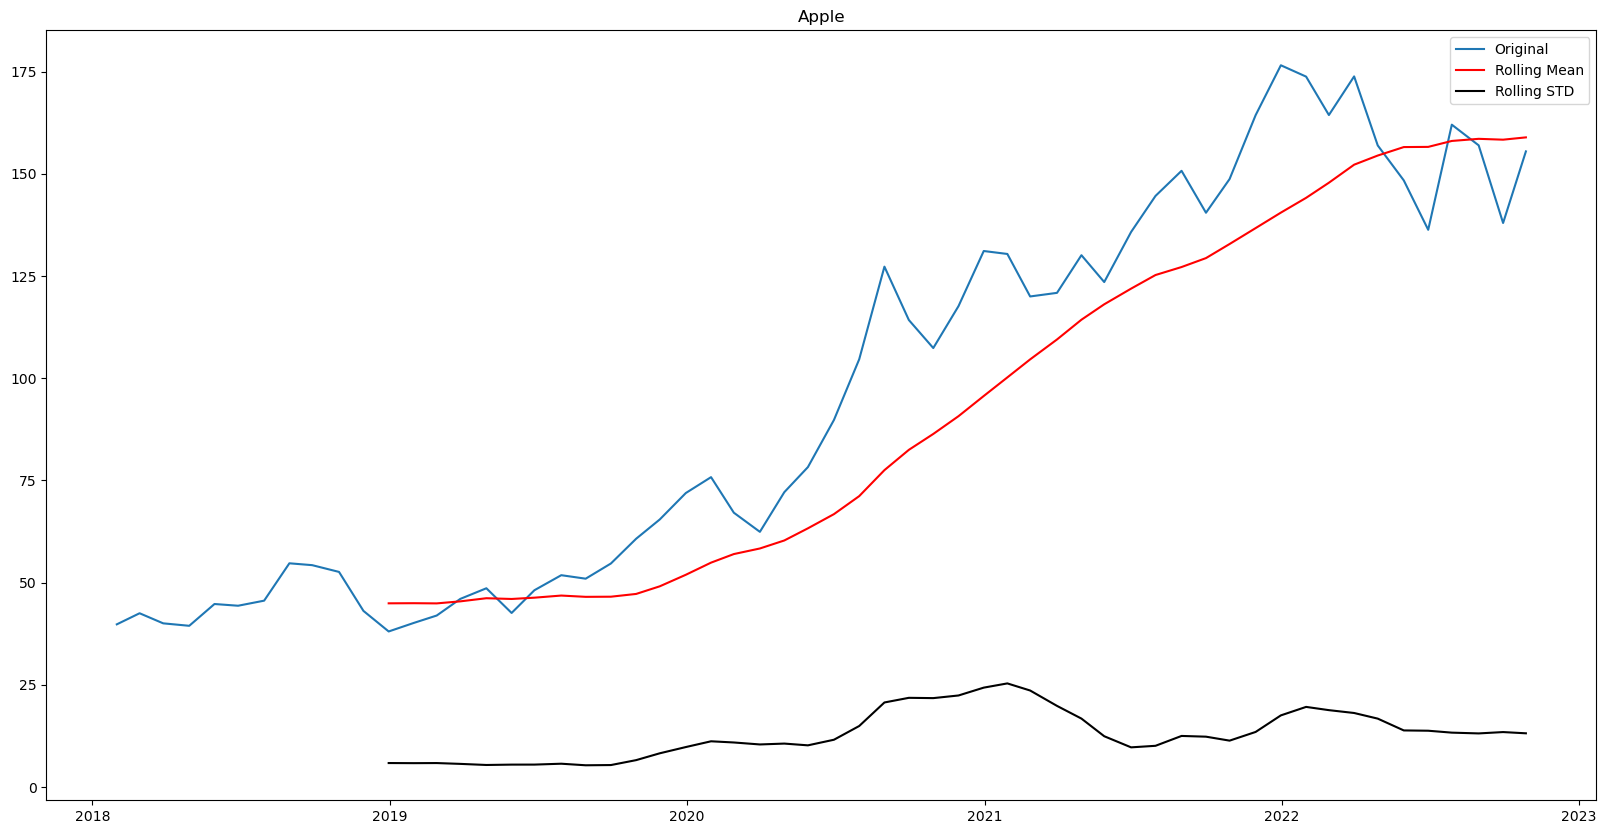

In [116]:
test_stationarity(apple_monthy2018,'Apple')

In [117]:
ts_log = np.log(apple_monthy2018)

In [118]:
decomposition = seasonal_decompose(ts_log, period = 12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

Time Series is Stationary
Test Statistics:-5.8860
p-value:0.0000
# Lags Used:3.0000
# Obs used:42.0000
Critical 1%:-3.5966
Critical 5%:-2.9333
Critical 10%:-2.6050


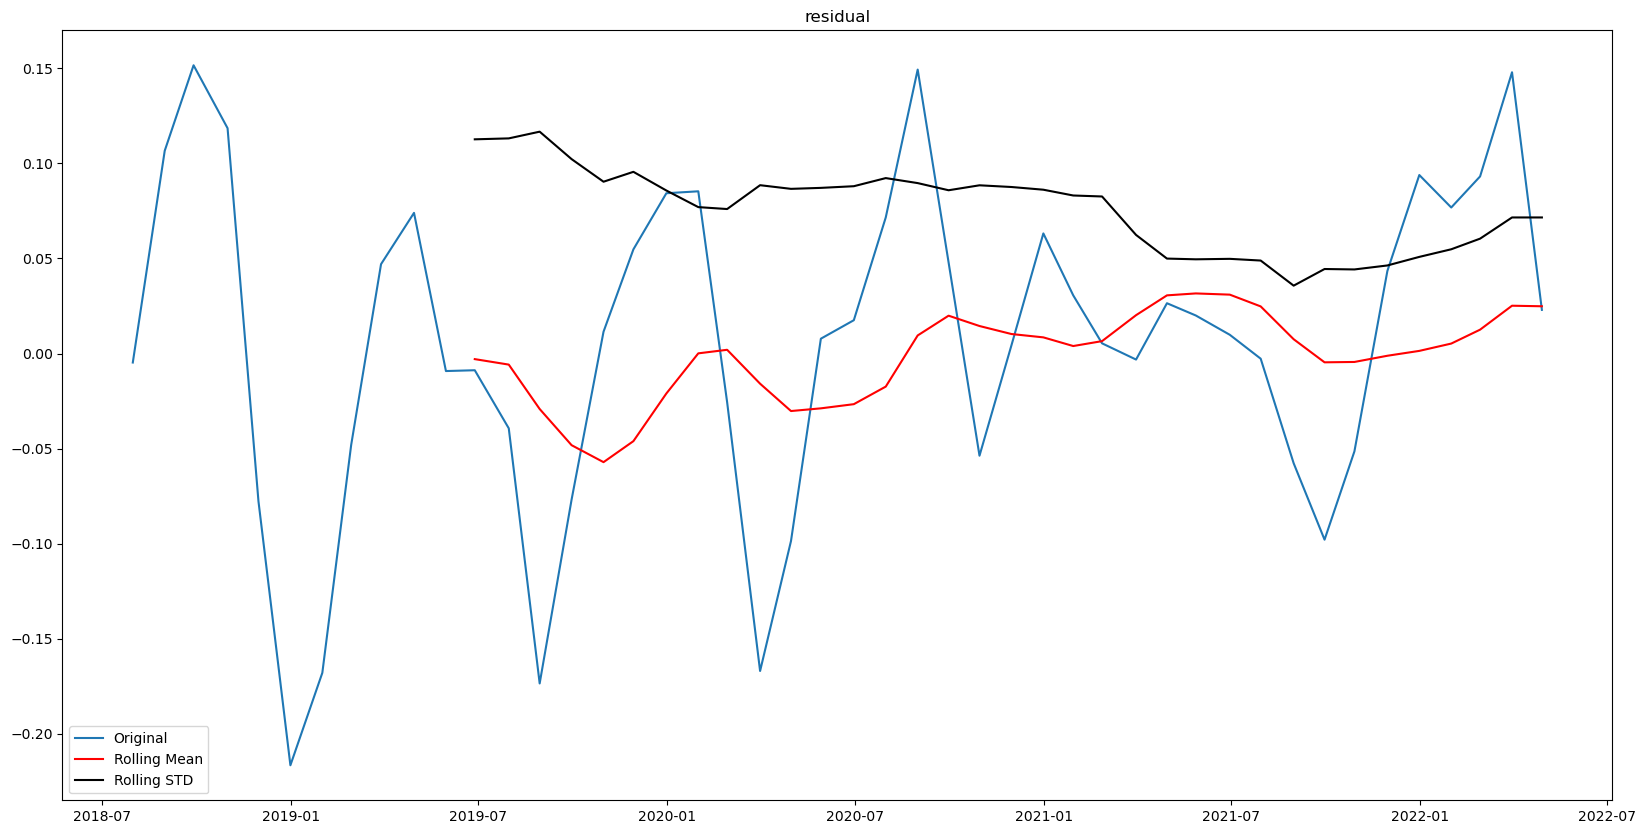

In [120]:
test_stationarity(residual.dropna(),'residual')

In [121]:
residual.dropna(inplace = True)

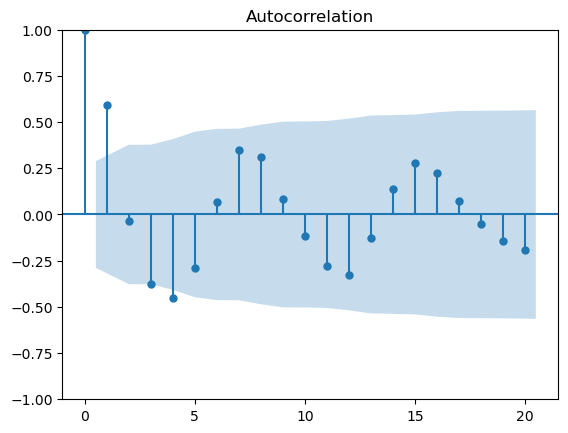

In [122]:
plot_acf(residual,lags=20)
plt.show()

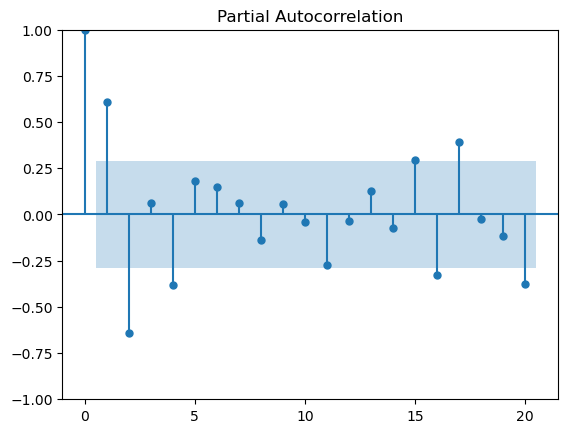

In [123]:
plot_pacf(residual,lags=20)
plt.show()

In [124]:
train= apple_monthy2018[:-6]
test = apple_monthy2018[-6:]

In [125]:
model = ARIMA(train, order=(4, 2, 2))
results_ARIMA = model.fit()
train_pred = results_ARIMA.fittedvalues

In [126]:
test.index

DatetimeIndex(['2022-05-31', '2022-06-30', '2022-07-29', '2022-08-31',
               '2022-09-30', '2022-10-28'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [127]:
forecast = results_ARIMA.forecast(6)

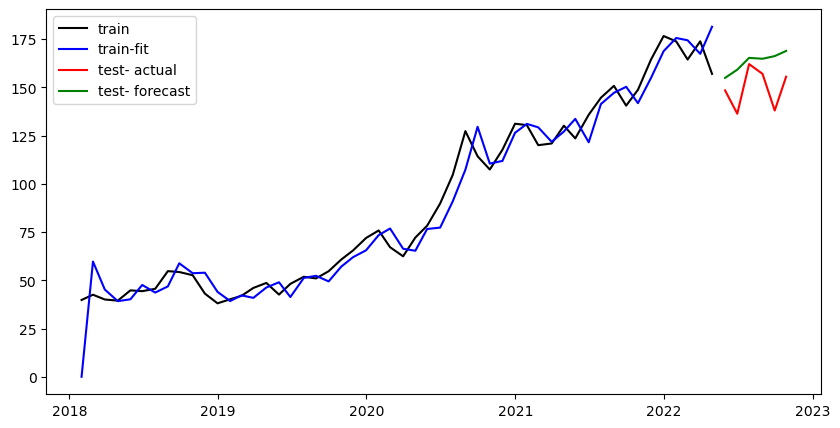

In [128]:
plt.figure(figsize = (10,5))
plt.plot(train, color = 'black', label = 'train')
plt.plot(train_pred, color = 'blue', label = 'train-fit')
plt.plot(test, color = 'red', label = 'test- actual')
plt.plot(test.index, forecast,color = 'green', label = 'test- forecast')
plt.legend()
plt.show()

In [129]:
mean_absolute_percentage_error(y_true = test, y_pred = forecast)

0.09515199935999913

In [130]:
metrics_copy=df2.copy()

In [131]:
sorted_metrics = metrics_copy.sort_values(['sector', 'market_cap'], ascending = False)

In [132]:
sector_market_cap = sorted_metrics.groupby('sector').head(2)[['sector','symbol', 'market_cap']]
month_end_Data.head()

,Date,Symbol,Adj Close,YOY,MOM
0,2012-10-31,AAPL,18.201437,NaN,NaN
21,2012-11-30,AAPL,17.976198,NaN,-1.237478
41,2012-12-31,AAPL,16.344994,NaN,-9.074247
62,2013-01-31,AAPL,13.989849,NaN,-14.408966
81,2013-02-28,AAPL,13.636104,NaN,-2.528587


In [133]:
trend_data = month_end_Data[month_end_Data.Symbol.isin(sector_market_cap.symbol)].copy()

In [134]:
last_5_start = dt.datetime.today() - rd(years = 5, day = 1)
last_5_start

datetime.datetime(2018, 9, 1, 21, 37, 41, 986197)

In [135]:
data_last_5 = trend_data[trend_data.Date > last_5_start].copy()

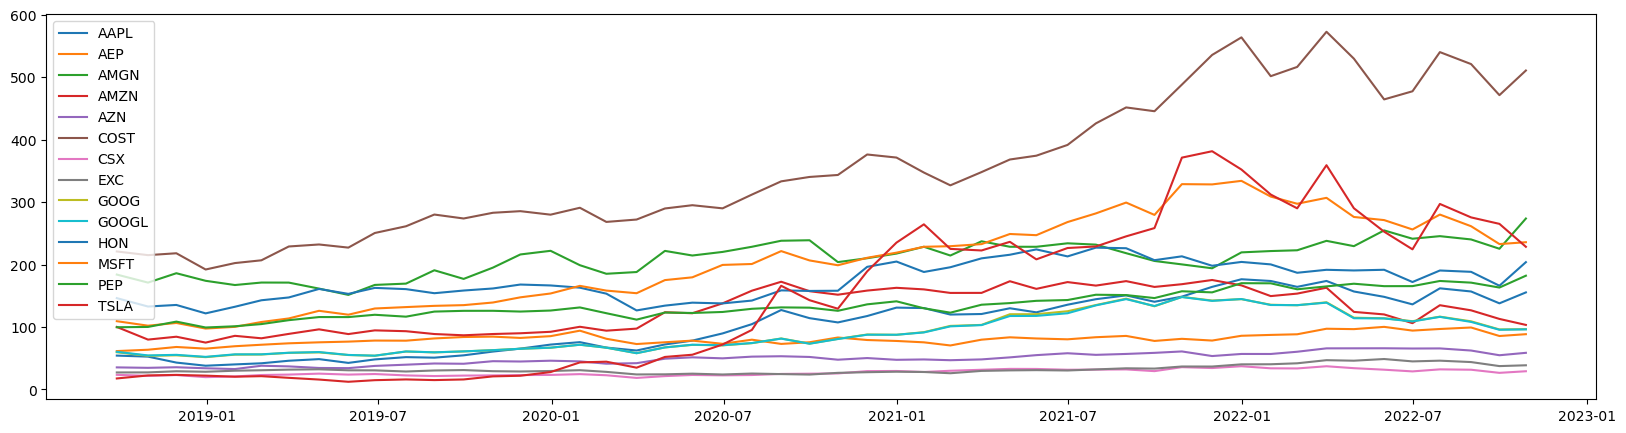

In [136]:
plt.figure(figsize = (20,5))
for comp in data_last_5.Symbol.unique():
    temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
    plt.plot(temp_ts, label = comp)
    plt.legend()
plt.show()

Time Series is Non-Stationary
Test Statistics:-1.2378
p-value:0.6571
# Lags Used:7.0000
# Obs used:42.0000
Critical 1%:-3.5966
Critical 5%:-2.9333
Critical 10%:-2.6050


<Figure size 2000x500 with 0 Axes>

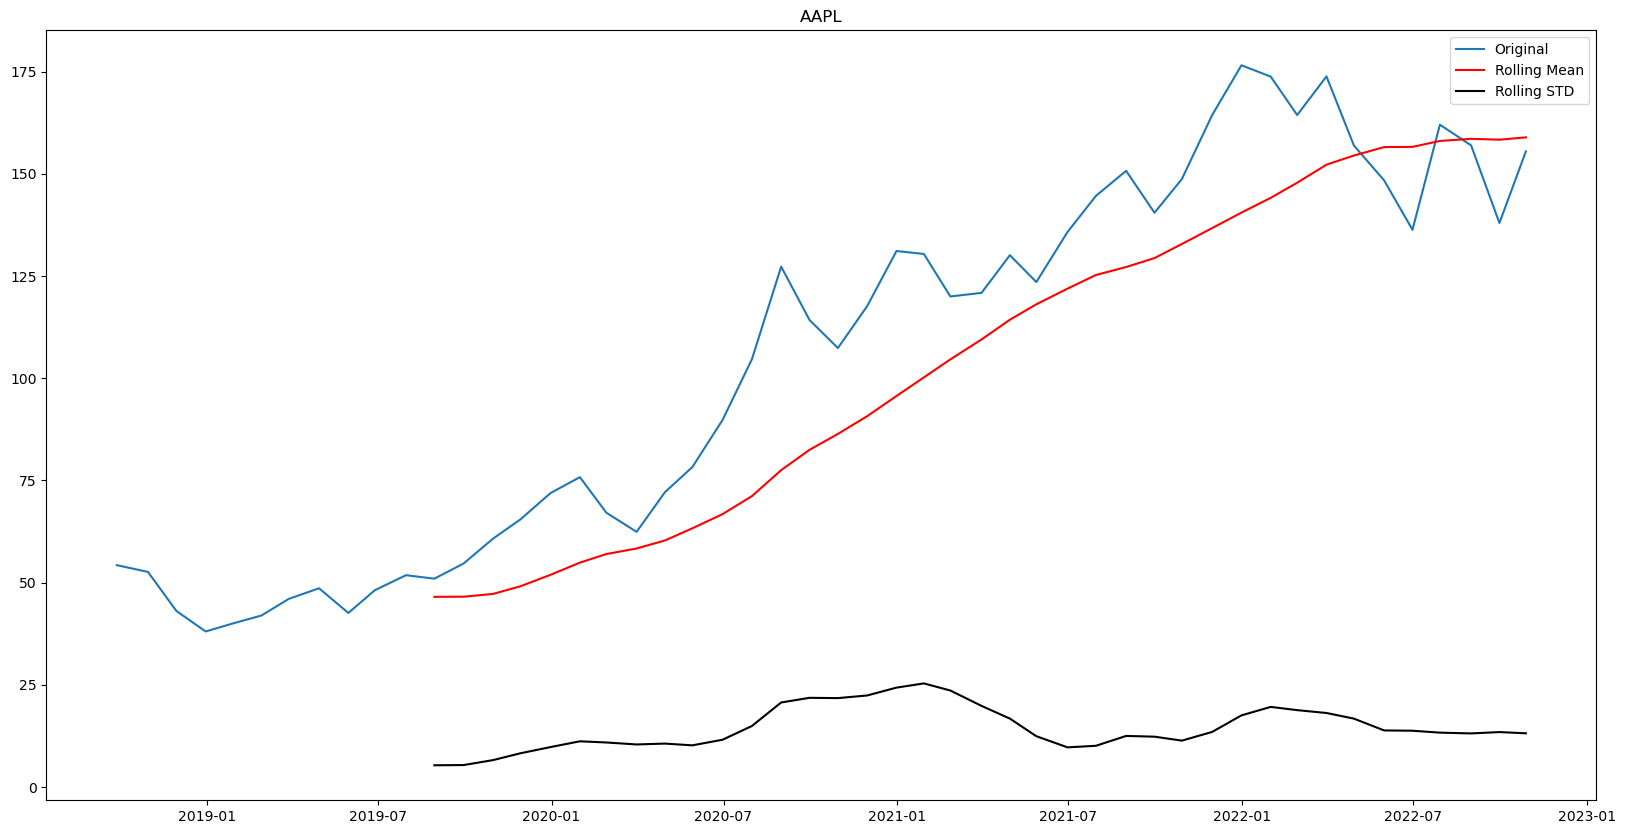

Time Series is Non-Stationary
Test Statistics:-2.6033
p-value:0.0923
# Lags Used:0.0000
# Obs used:49.0000
Critical 1%:-3.5715
Critical 5%:-2.9226
Critical 10%:-2.5993


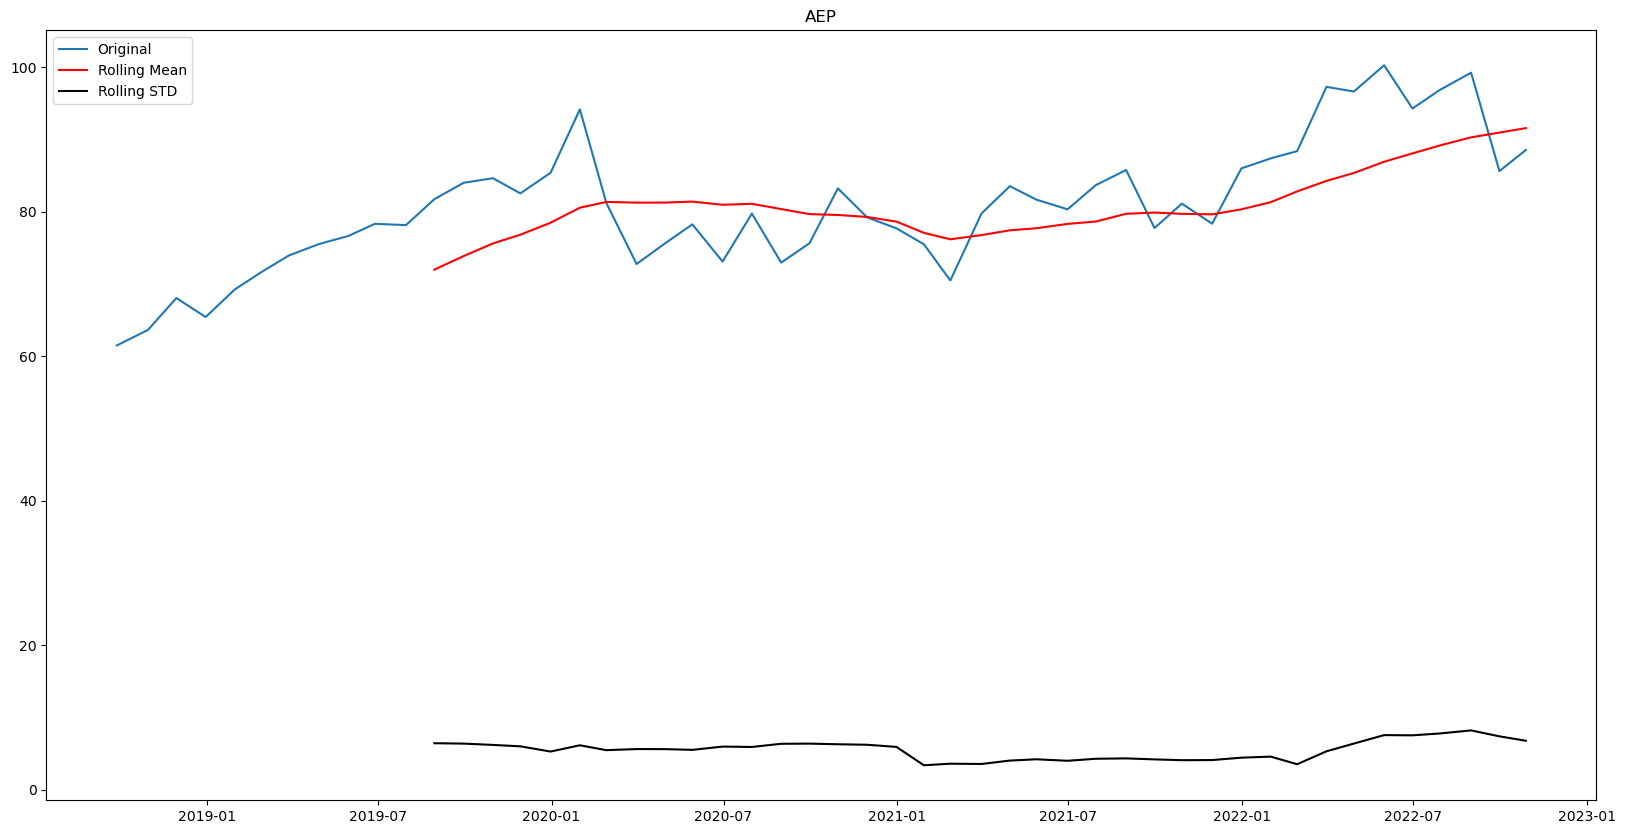

Time Series is Non-Stationary
Test Statistics:-1.4191
p-value:0.5731
# Lags Used:0.0000
# Obs used:49.0000
Critical 1%:-3.5715
Critical 5%:-2.9226
Critical 10%:-2.5993


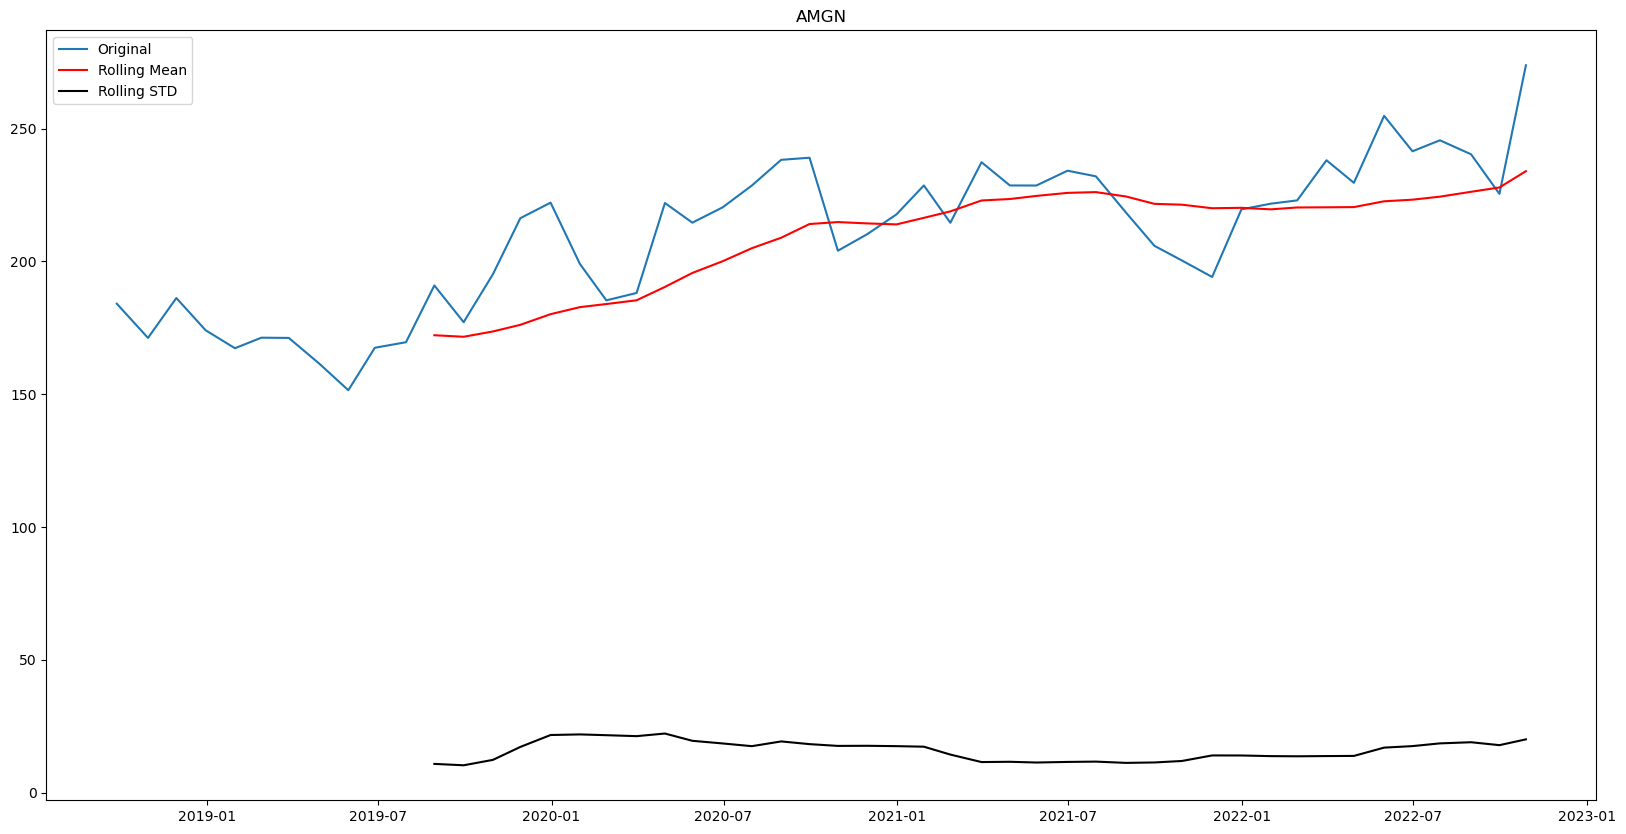

Time Series is Non-Stationary
Test Statistics:-1.2737
p-value:0.6411
# Lags Used:0.0000
# Obs used:49.0000
Critical 1%:-3.5715
Critical 5%:-2.9226
Critical 10%:-2.5993


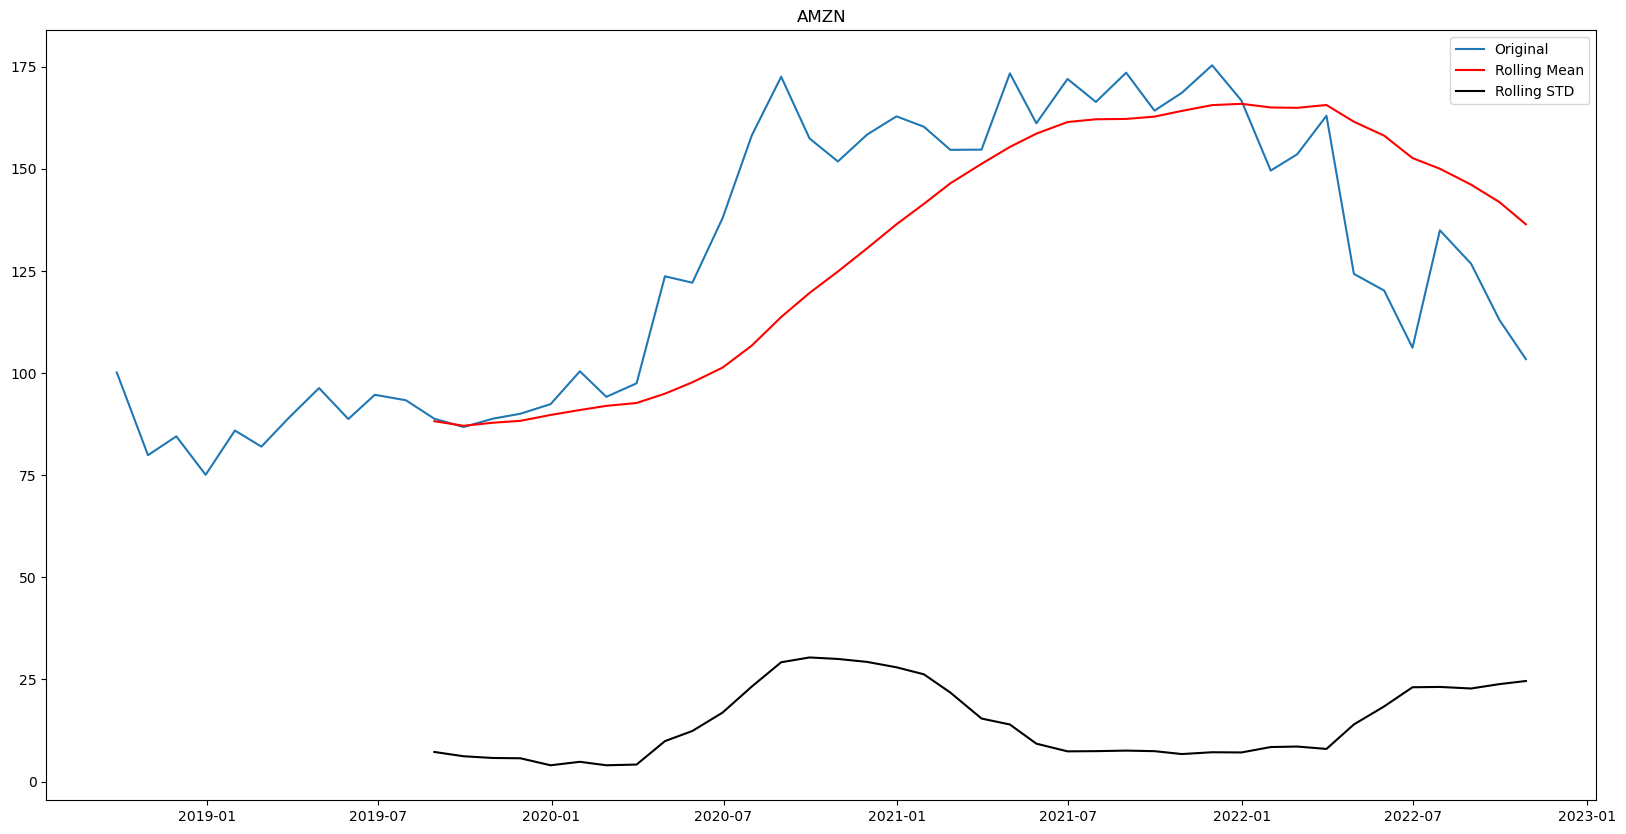

Time Series is Non-Stationary
Test Statistics:-1.3311
p-value:0.6148
# Lags Used:0.0000
# Obs used:49.0000
Critical 1%:-3.5715
Critical 5%:-2.9226
Critical 10%:-2.5993


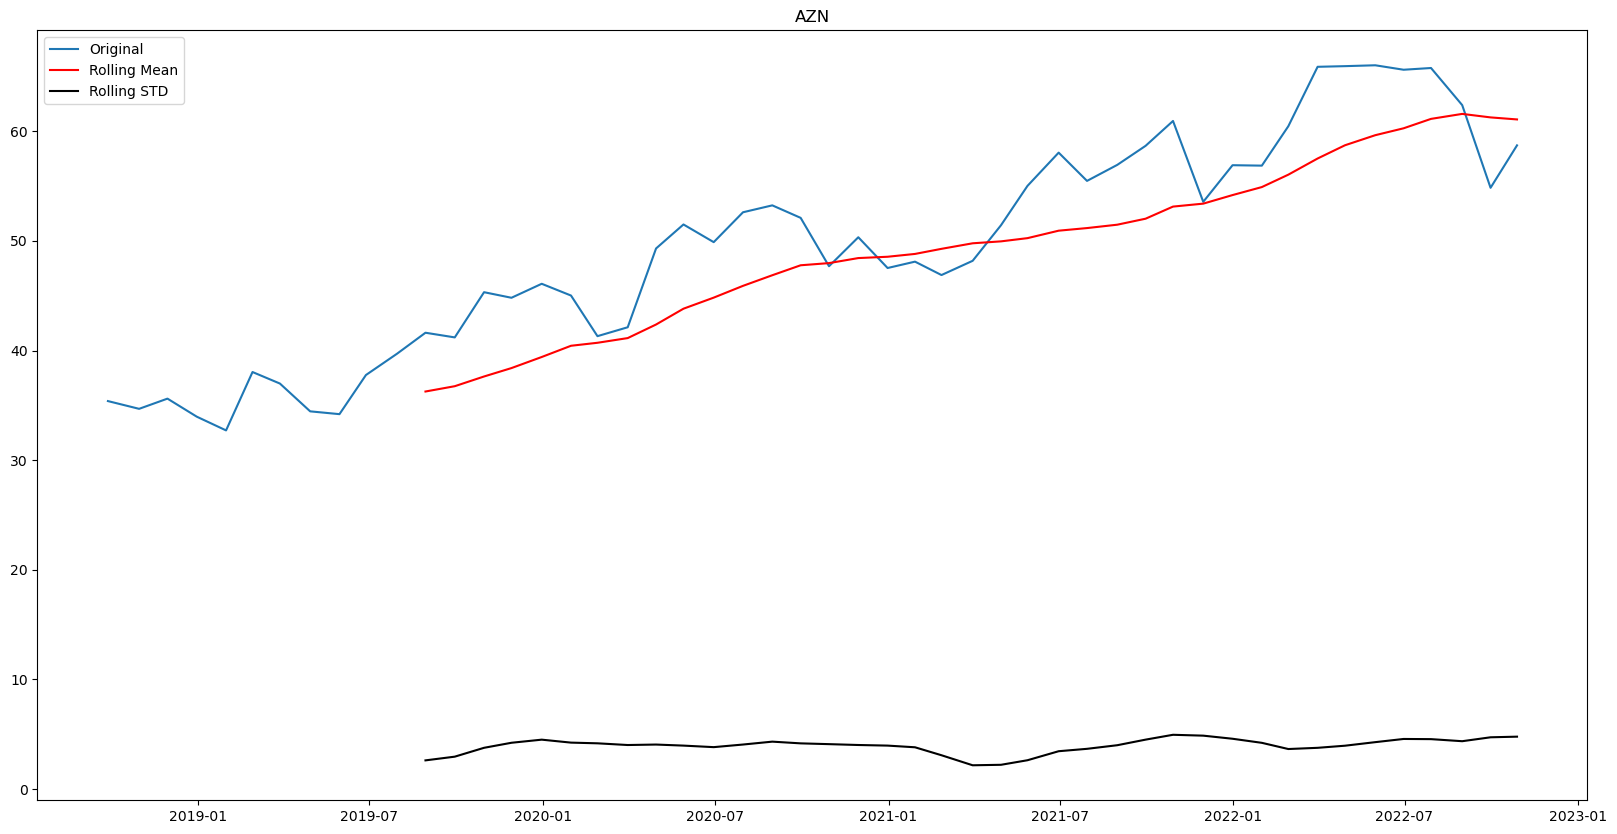

Time Series is Non-Stationary
Test Statistics:0.0037
p-value:0.9588
# Lags Used:6.0000
# Obs used:43.0000
Critical 1%:-3.5925
Critical 5%:-2.9315
Critical 10%:-2.6041


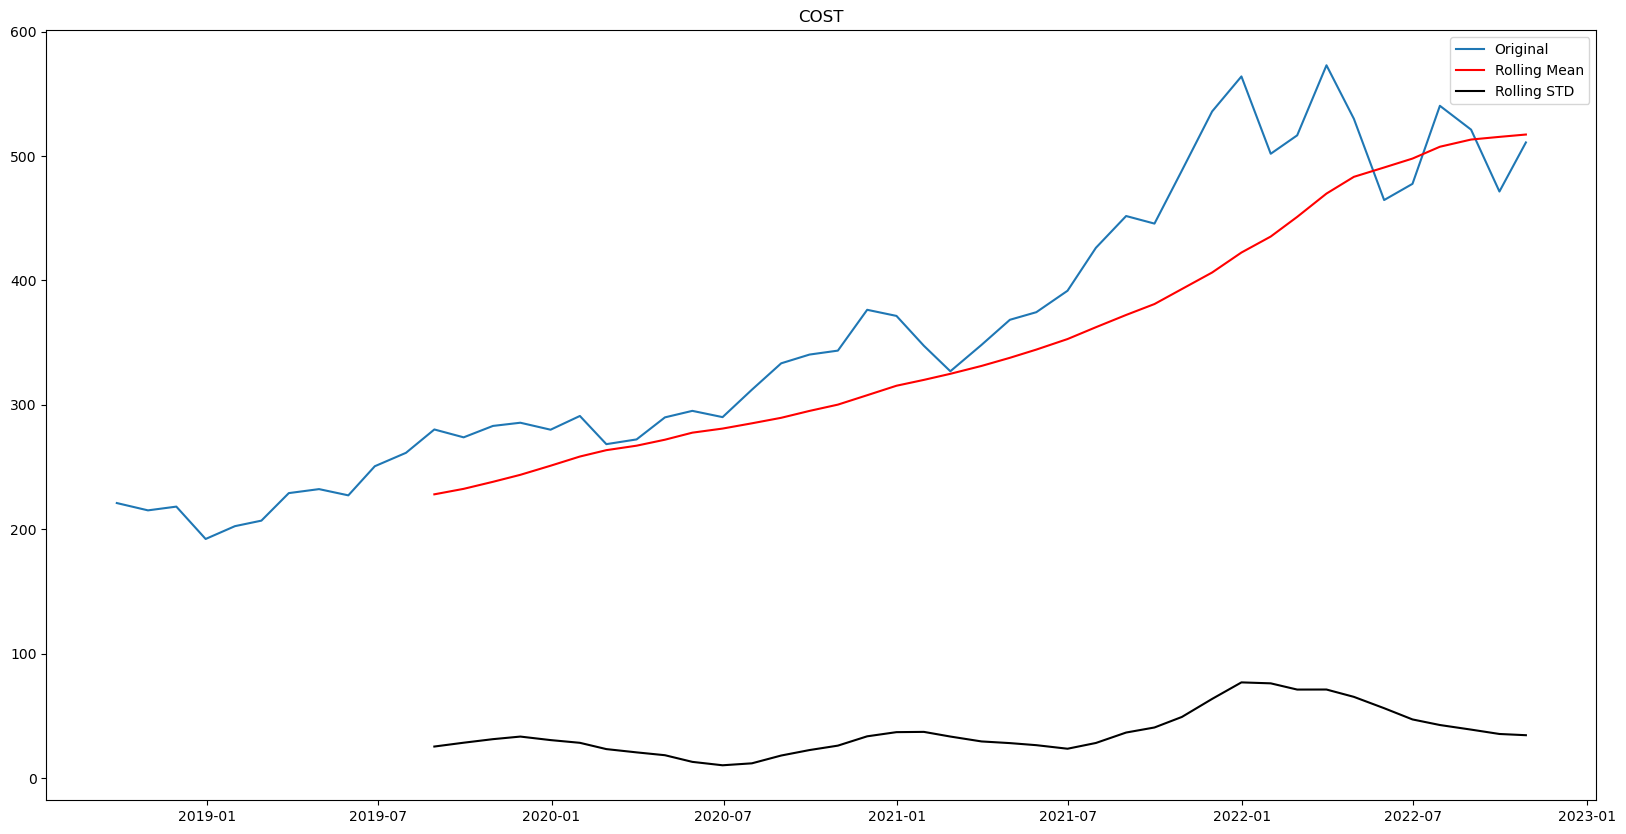

Time Series is Non-Stationary
Test Statistics:-1.6455
p-value:0.4594
# Lags Used:0.0000
# Obs used:49.0000
Critical 1%:-3.5715
Critical 5%:-2.9226
Critical 10%:-2.5993


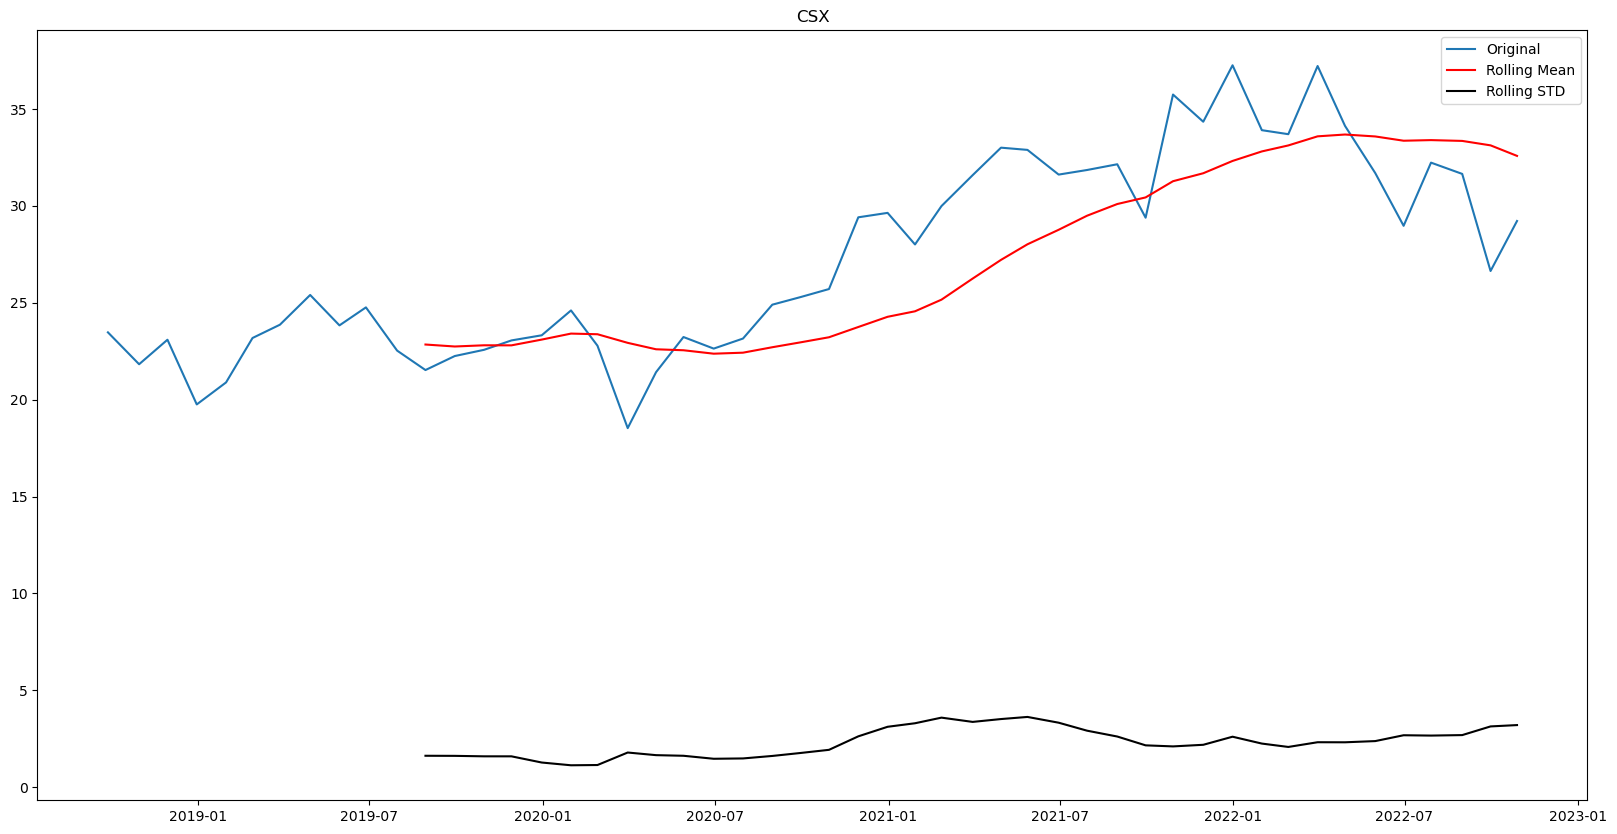

Time Series is Non-Stationary
Test Statistics:-2.5898
p-value:0.0951
# Lags Used:11.0000
# Obs used:38.0000
Critical 1%:-3.6155
Critical 5%:-2.9413
Critical 10%:-2.6092


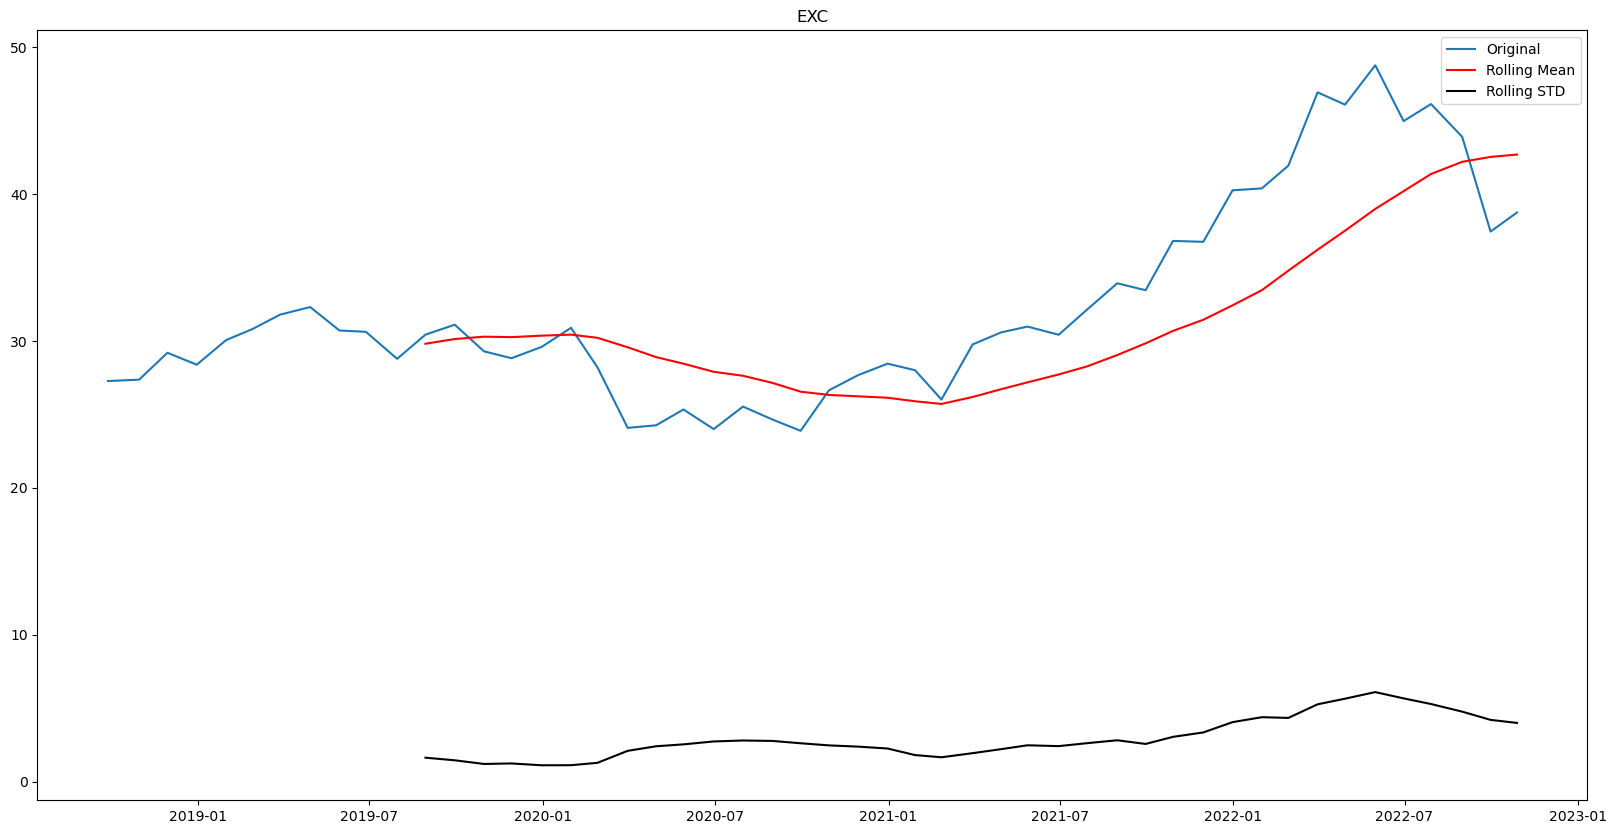

Time Series is Non-Stationary
Test Statistics:-2.0484
p-value:0.2658
# Lags Used:5.0000
# Obs used:44.0000
Critical 1%:-3.5886
Critical 5%:-2.9299
Critical 10%:-2.6032


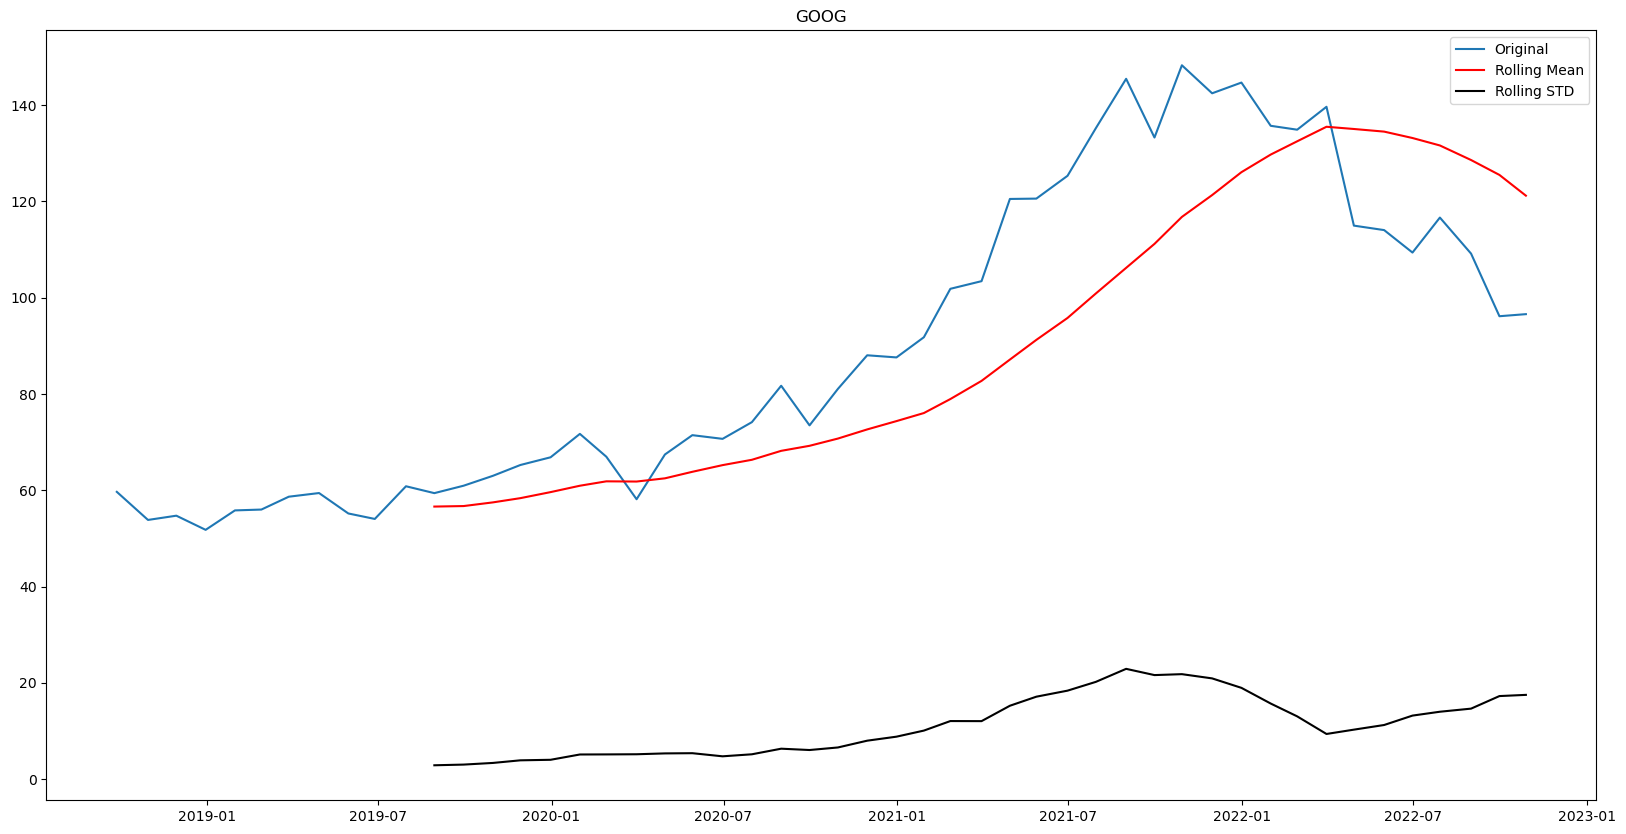

Time Series is Non-Stationary
Test Statistics:-2.0687
p-value:0.2573
# Lags Used:5.0000
# Obs used:44.0000
Critical 1%:-3.5886
Critical 5%:-2.9299
Critical 10%:-2.6032


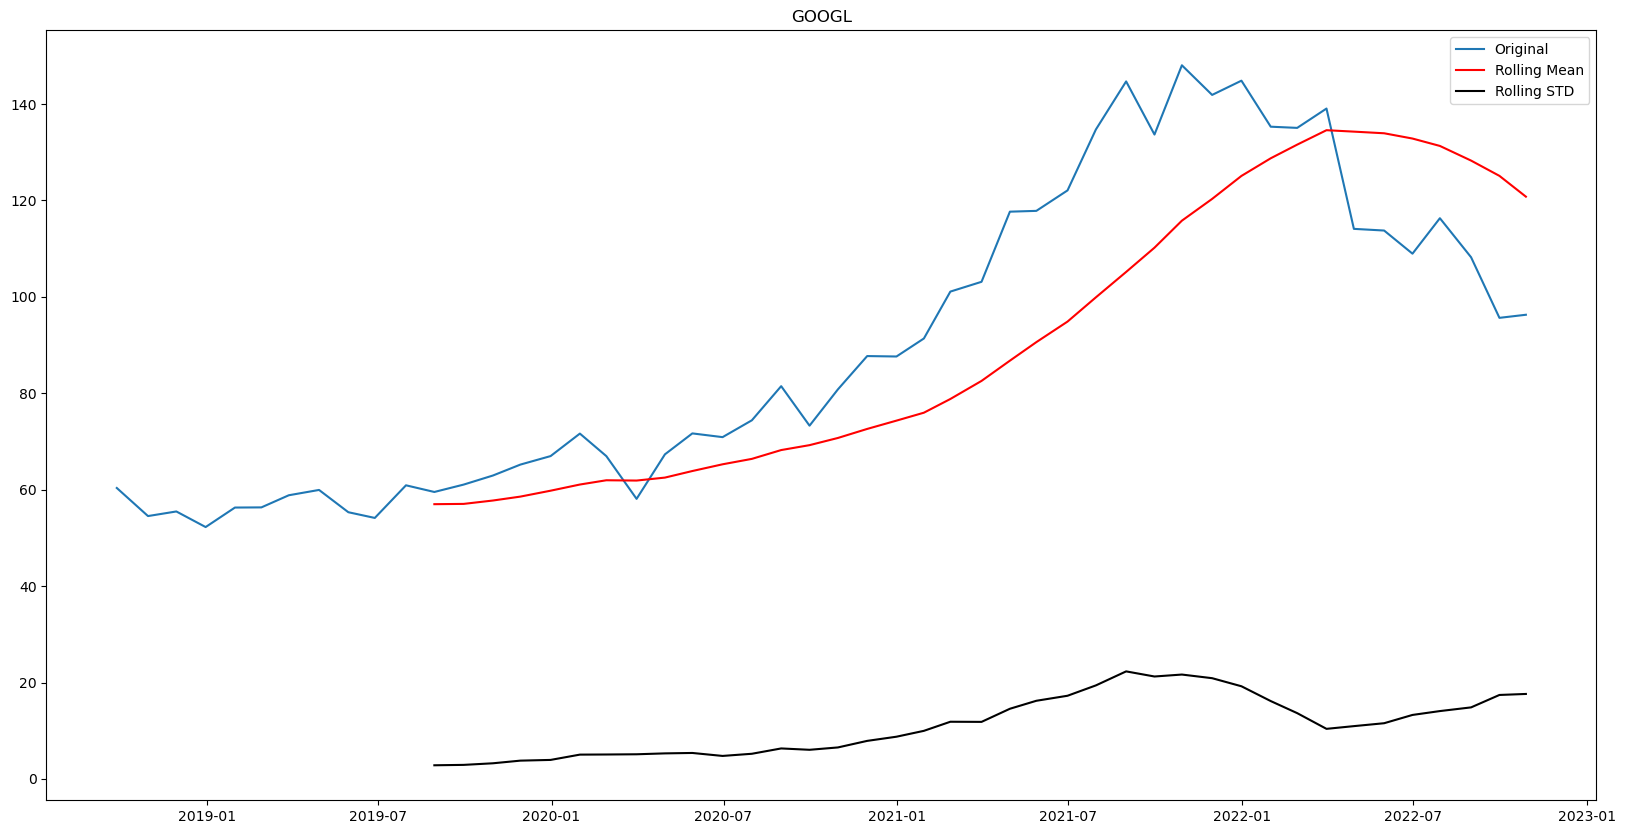

Time Series is Non-Stationary
Test Statistics:-2.0288
p-value:0.2741
# Lags Used:3.0000
# Obs used:46.0000
Critical 1%:-3.5813
Critical 5%:-2.9268
Critical 10%:-2.6015


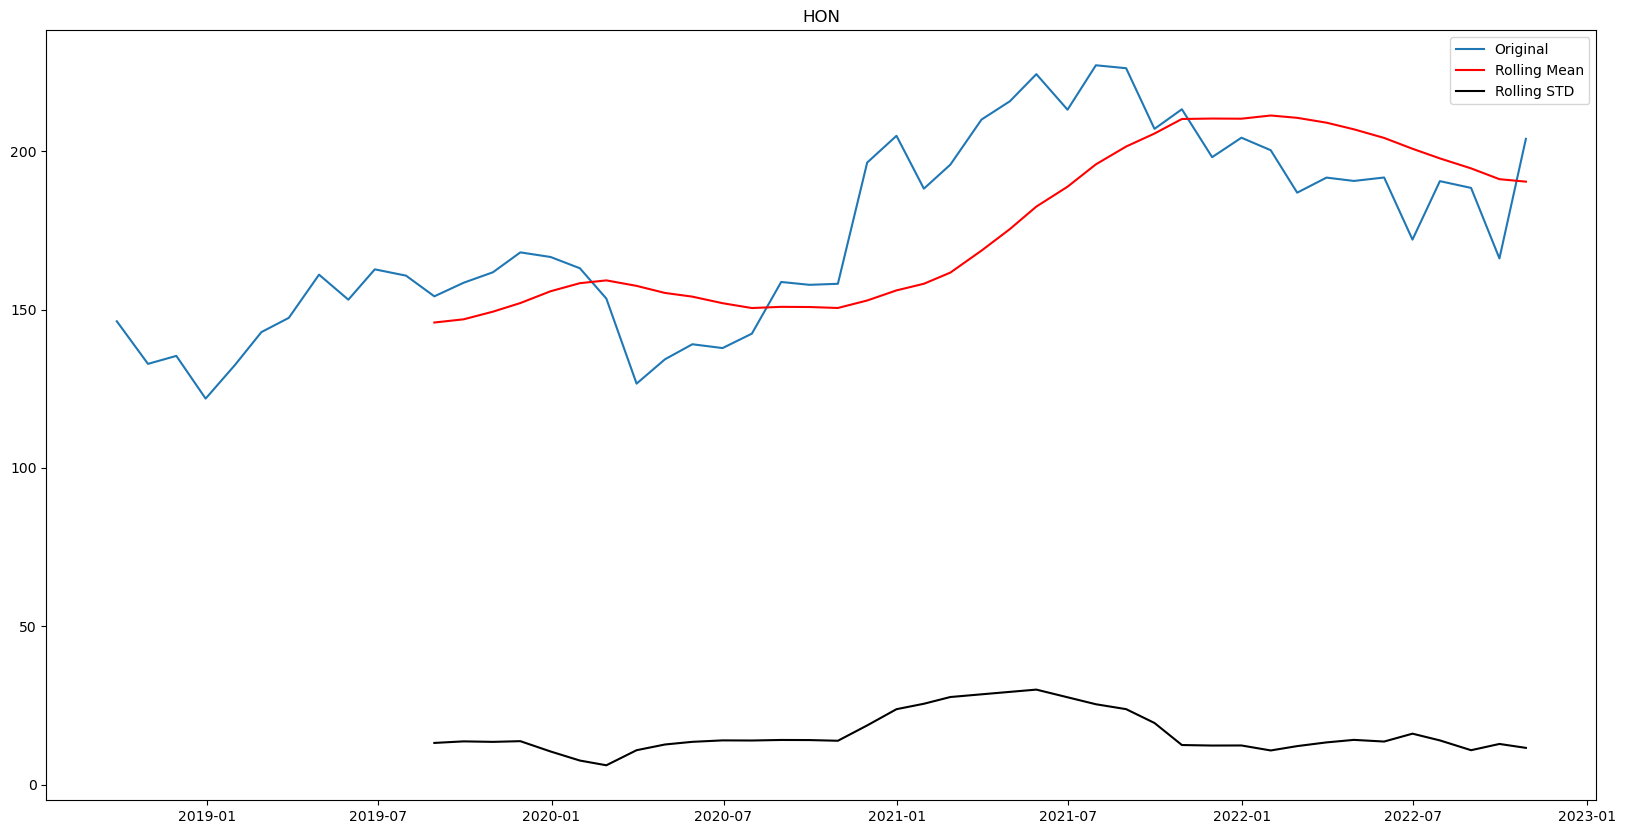

Time Series is Non-Stationary
Test Statistics:-1.2894
p-value:0.6340
# Lags Used:0.0000
# Obs used:49.0000
Critical 1%:-3.5715
Critical 5%:-2.9226
Critical 10%:-2.5993


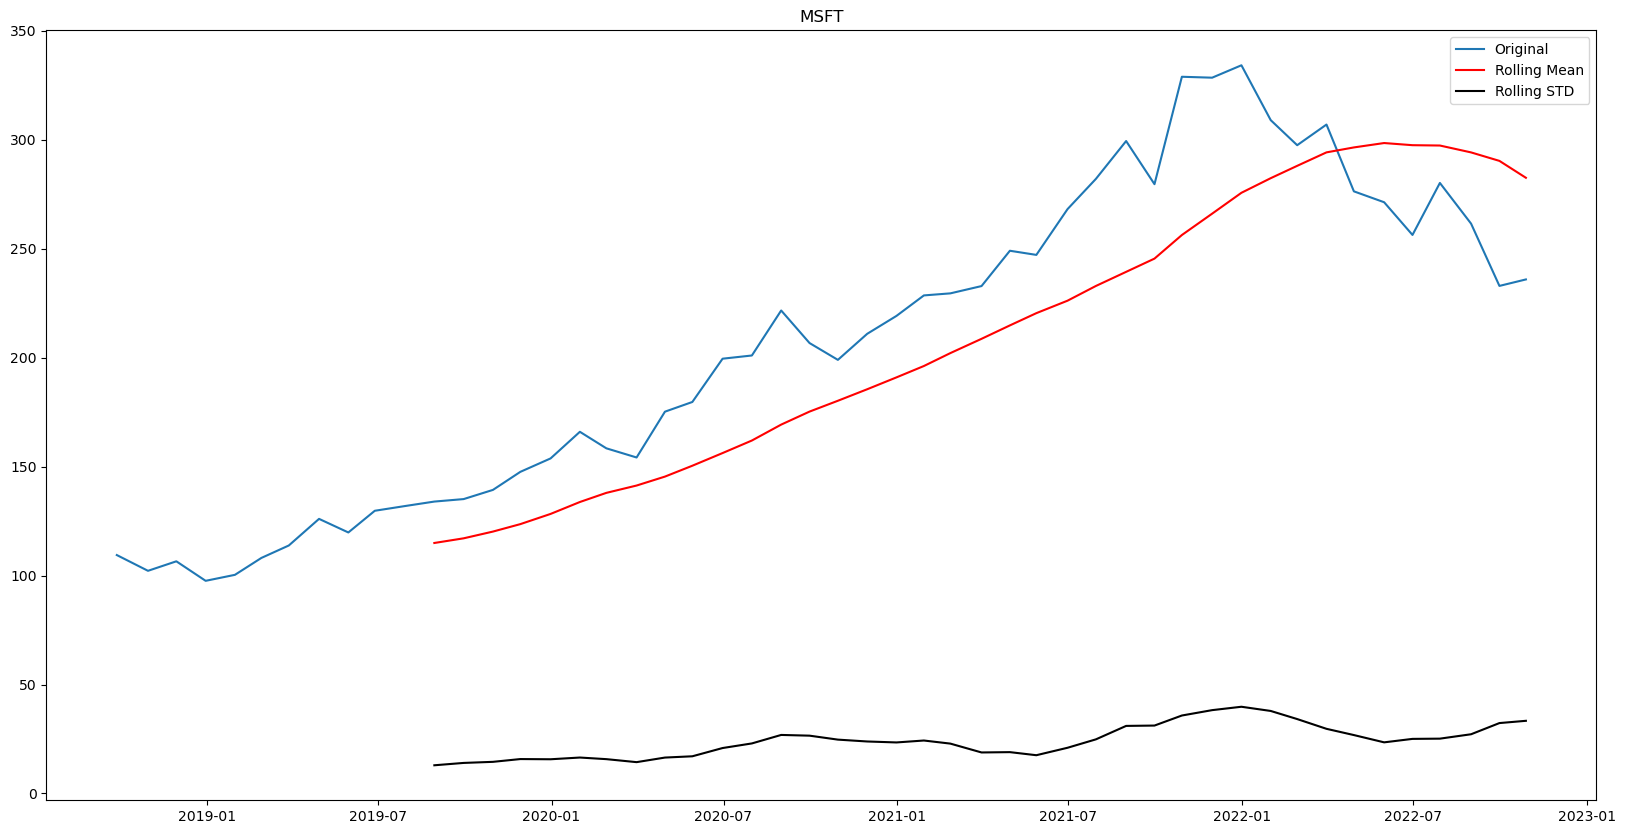

Time Series is Non-Stationary
Test Statistics:0.1345
p-value:0.9683
# Lags Used:2.0000
# Obs used:47.0000
Critical 1%:-3.5778
Critical 5%:-2.9253
Critical 10%:-2.6008


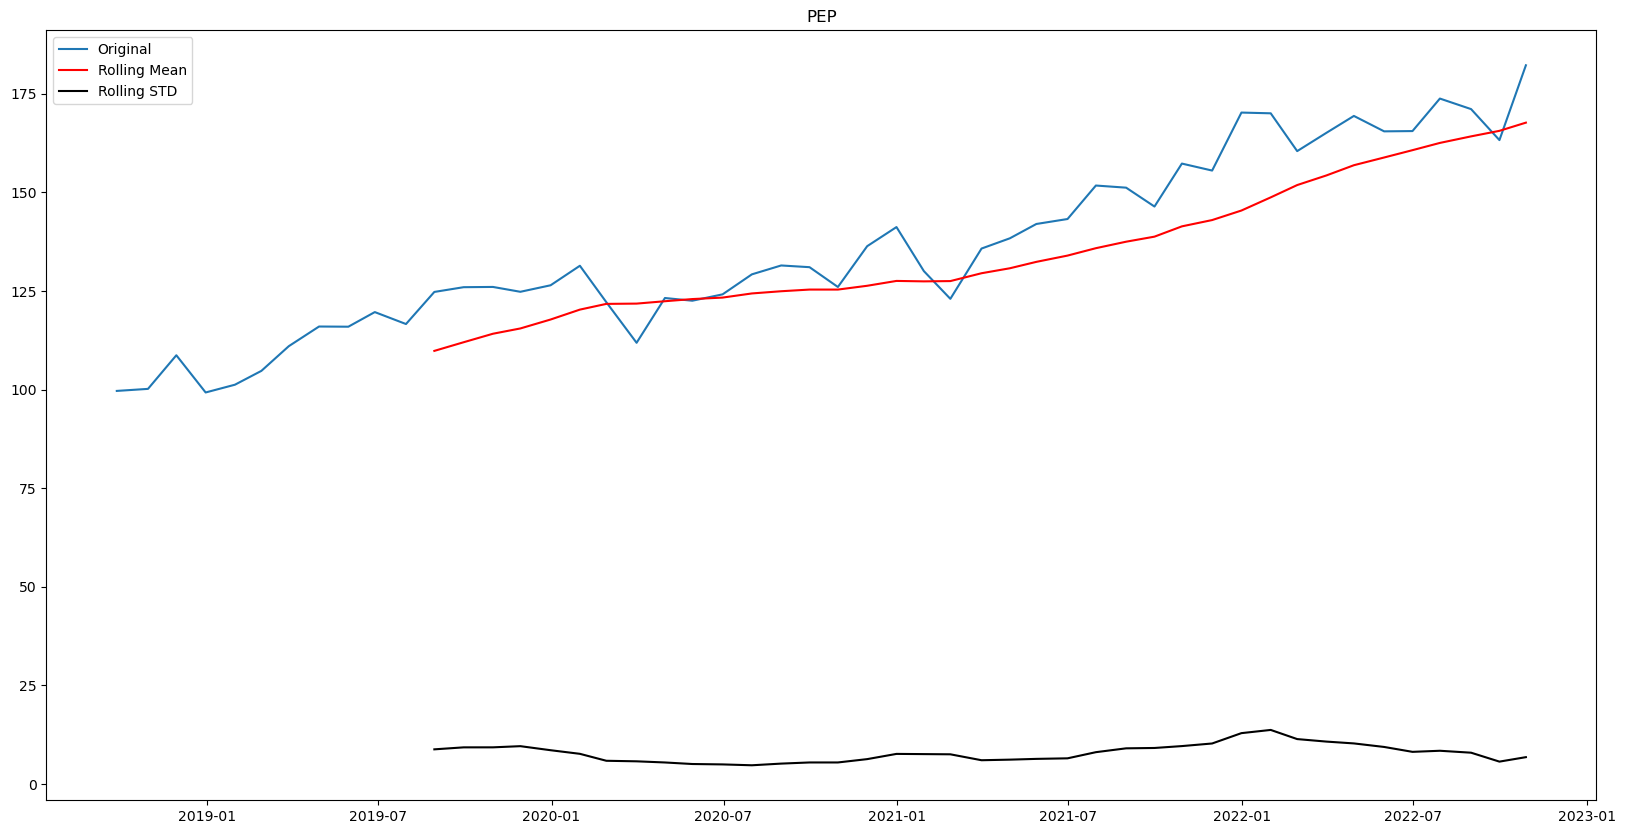

Time Series is Non-Stationary
Test Statistics:-2.5622
p-value:0.1011
# Lags Used:11.0000
# Obs used:38.0000
Critical 1%:-3.6155
Critical 5%:-2.9413
Critical 10%:-2.6092


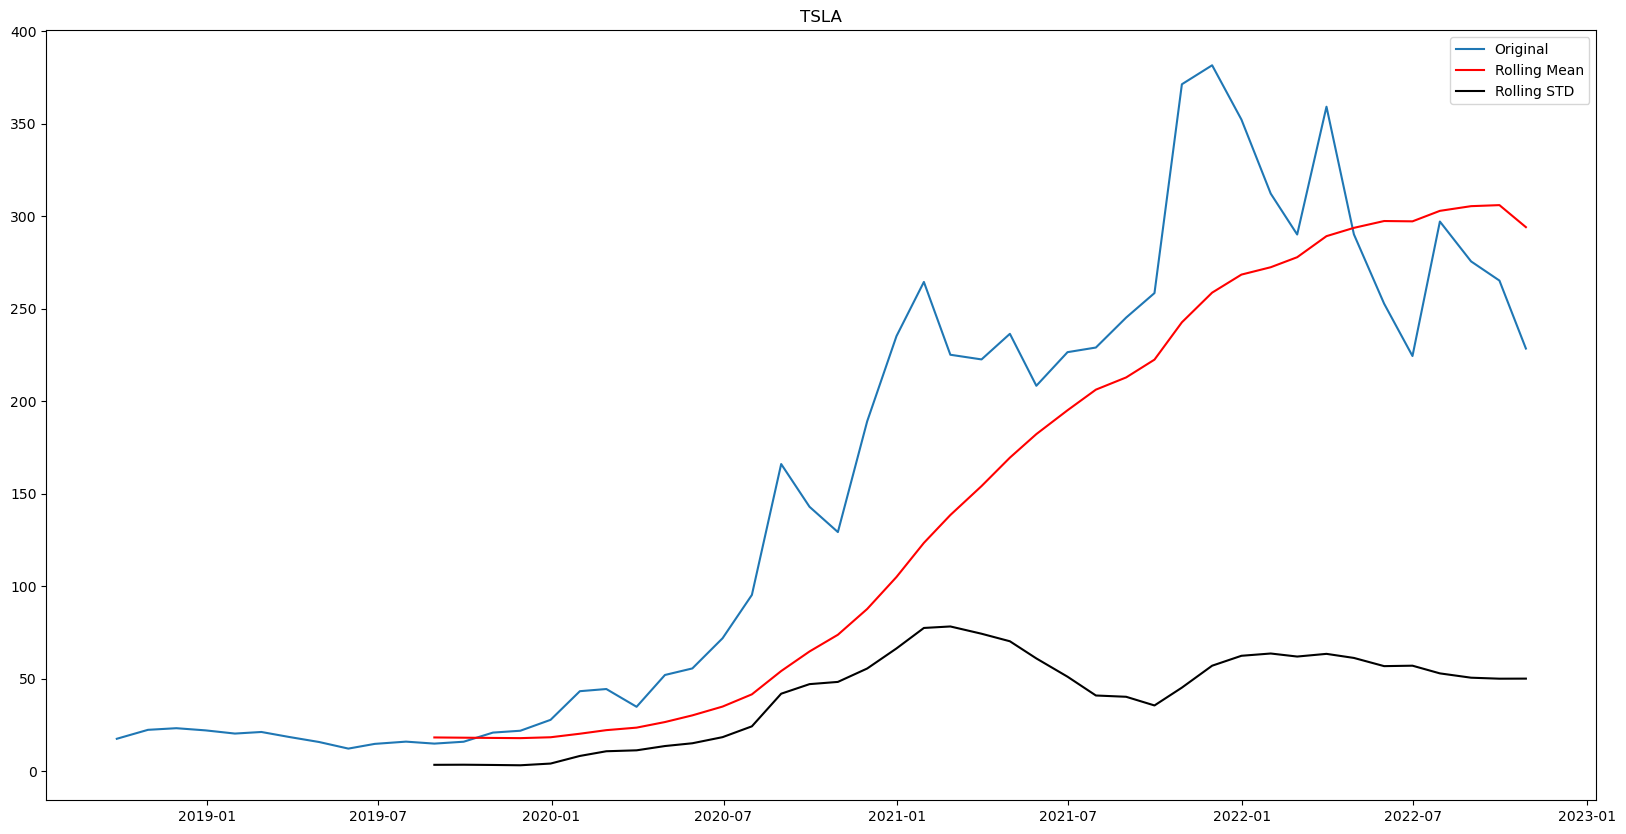

In [137]:
plt.figure(figsize = (20,5))
for comp in data_last_5.Symbol.unique():
    temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
    test_stationarity(temp_ts, comp)

In [138]:
def auto_arima_foo(ts, company ):
    train = ts[:-12]
    test = ts [-12:]
    model = auto_arima(train, trace = False )
    model.fit(train)
    fit = model.predict_in_sample(train)
    forecast = model.predict(n_periods=len(test))
    mape = mean_absolute_percentage_error(y_true = test, y_pred = forecast )
    print('Best model parameters for {} is {}'.format(company, model ))
    return mape

In [139]:
result = {}
for comp in data_last_5.Symbol.unique():
    temp_ts = data_last_5.loc[data_last_5.Symbol == comp, ['Date','Adj Close']].set_index('Date').squeeze()
    result.update({comp : auto_arima_foo(temp_ts, comp)})

Best model parameters for AAPL is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for AEP is  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model parameters for AMGN is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for AMZN is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for AZN is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for COST is  ARIMA(0,1,0)(0,0,0)[0] intercept
Best model parameters for CSX is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for EXC is  ARIMA(1,0,0)(0,0,0)[0] intercept
Best model parameters for GOOG is  ARIMA(3,2,0)(0,0,0)[0]          
Best model parameters for GOOGL is  ARIMA(3,2,3)(0,0,0)[0]          
Best model parameters for HON is  ARIMA(0,1,0)(0,0,0)[0]          
Best model parameters for MSFT is  ARIMA(1,2,1)(0,0,0)[0]          
Best model parameters for PEP is  ARIMA(0,1,2)(0,0,0)[0] intercept
Best model parameters for TSLA is  ARIMA(0,1,0)(0,0,0)[0] intercept
